# Olist Sales Prediction

Olist was founded in 2015 and was relatively new business when they released their dataset on Kaggel. We have observations from Sept 2016 to Aug 2018.
For a relatively new business it is very critical to understand how their business is growing and how they can be prepared to scale and maintain it further.

Keeping this in mind, we are trying to forecast the sales for Olist so that they can channelize their resources for stock preparation, marketing campaigns and get better prepared for future.

# Index

[1. Importing Libraries](#Importing_libraries) </br>
[2. Importing Data](#Importing_Data)</br>
$\;\;\;\;$    [2.1 Data dictionary](#Data_dictionary) </br>
$\;\;\;\;$    [2.2 Processing data for time series](#Processing_data_for_time_series) </br>
[3. Explorartory Data Analysis](#Explorartory_Data_Analysis)</br>
$\;\;\;\;$    [3.1 General exploration](#General_exploration) </br>
$\;\;\;\;$    [3.2 Decomposing time series](#Decomposing_time_series) </br>
$\;\;\;\;$    [3.3 Checking stationarity](#Checking_stationarity) </br>
[4. Preparation for Modeling](#Preparation_for_Modeling)</br>
$\;\;\;\;$    [4.1 Train and test split](#Train_test_split) </br>
$\;\;\;\;$    [4.2 Defining functions for plotting predictions and forecast](#plotting_func) </br>
$\;\;\;\;$    [4.3 Defining functions for evaluation](#evaluation_metrics) </br>
[5. Modelling (SARIMA)](#SARIMA) </br>
$\;\;\;\;$    [5.1 Plotting ACF and PACF plot](#ACF_PACF) </br>
$\;\;\;\;$    [5.2 Applying SARIMA model](#Baseline) </br>
$\;\;\;\;$    [5.3 Plotting predictions and evaluating SARIMA model](#plot) </br>
$\;\;\;\;$    [5.4 Adding Exogenous variable holiday for SARIMAX](#SARIMAX) </br>
$\;\;\;\;$    [5.5 Applying grid search on SARIMAX with exogenous variable](#Grid_search) </br>
$\;\;\;\;$    [5.6 Plotting predictions and evaluating SARIMAX model](#plot_sarimax) </br>
[6. Modelling (FB Prophet)](#FB_Prophet) </br>
$\;\;\;\;$    [6.1 Preparing data for FB Prophet](#fb_prep) </br>
$\;\;\;\;$    [6.2 Applying a Baseline FB Prophet](#fb_baseline) </br>
$\;\;\;\;$    [6.3 Plotting and Evaluating Baseline model](#fb_plot) </br>
$\;\;\;\;$    [6.4 Tuning FB Prophet using Grid Search](#fb_tuning) </br>
$\;\;\;\;$    [6.5 Plotting and evaluating Tuned FB Prophet](#fb_fin) </br>
[7. Modelling (XG Boost Regression)](#xg_boost) </br>
$\;\;\;\;$    [7.1 Preparing data for XG Boost Regression](#xg_boost_prep) </br>
$\;\;\;\;$    [7.2 Baseline model on daily data and its performance](#xg_baseline) </br>
$\;\;\;\;$    [7.3 Tuning XG Boost and evaluating and its performance](#xg_tuned) </br>
[8. Modelling (LSTM)](#LSTM) </br>
$\;\;\;\;$    [8.1 Preparing data for LSTM](#lstm_prep) </br>
$\;\;\;\;$    [8.2 Baseline model on daily data and its performance](#lstm_baseline_eval) </br>
[9. Discussing issues encounted with hourly sampled data](#discussion) </br>
[10. Conclusion](#conclusion)

# 1. Importing Libraries

<a id="Importing_libraries"></a>

In [ ]:
!apt-get update
!apt-get install -y build-essential

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (188 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to prov

In [ ]:
!pip install --upgrade pip setuptools

In [ ]:
!apt-get update
!apt-get install -y g++

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:11 https://r2u.stat.illinois.edu/ubuntu jammy Release
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pack

In [ ]:
!python -m venv my_env
!source my_env/bin/activate
!pip install fbprophet --no-binary :all:

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/my_env/bin/python3

/bin/bash: line 1: my_env/bin/activate: No such file or directory
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5.tar.gz (45 kB)
  Preparing metadata (setup.py) ... done
  Using cached pystan-3.10.0.tar.gz (13 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached LunarCalendar-0.0.9.tar.gz (18 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for outp

In [ ]:
pip install prophet

In [ ]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style= 'darkgrid' )

#some built in functions
import itertools
from datetime import datetime, timedelta

import warnings
#to supress warning generated for fb prophet using .append method by default
# warnings.simplefilter(action='ignore', category=FutureWarning)
#to suppress warnings in Sarima model
# warnings.simplefilter(action='ignore', category=UserWarning)
warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from statsmodels.tools.sm_exceptions import InterpolationWarning
warnings.simplefilter('ignore', InterpolationWarning)

#importing high level interactive plotting libraries
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# importing time series stats model
import statsmodels.api as sm
from statsmodels.api import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#importing Sarimax
from statsmodels.tsa.statespace.sarimax import SARIMAX

#sklearn library
from sklearn.preprocessing import MinMaxScaler

#importing fb prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.plot import plot_plotly

#importing XG Boost
import xgboost as xgb
from xgboost import plot_importance, plot_tree

#importing LSTM libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [ ]:
import plotly.io as pio
pio.renderers.default= "svg"

#had to install orca to publish static images of plotly graph on git hub as plotly plots were not showing up.
# installed using conda install -c plotly plotly-orca and had to manually assign the path to orca exe.

# 2. Importing Data

<a id="Importing_Data"></a>

In [ ]:
# prompt: take files from google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the dataset
master=pd.read_csv('/content/drive/MyDrive/Project/master_dataset.csv')

In [ ]:
#reading the head
master.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2  0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3  bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   

  order_purchase_timestamp order_estimated_delivery_date  qty  \
0      2017-10-02 10:56:33                    2017-10-18    1   
1      2017-08-15 18:29:31                    2017-08-28    1   
2      2017-08-02 18:24:47                    2017-08-15    1   
3      2017-10-23 23:26:46                    2017-11-13    1   
4      2018-07-24 20:41:37                    2018-08-13    1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   

   shipping_limit_date   price  freight_value  ...  seller_state  seller_lat  \
0  2017-10-06 11:07:15   29.99           8.72  ...            SP  -23.680862   
1  2017-08-21 20:05:16   29.99           7.78  ...            SP  -23.680862   
2  2017-08-08 18:37:31   29.99           7.78  ...            SP  -23.680862   
3  2017-10-31 02:14:11   29.99          14.10  ...            SP  -23.680862   
4  2018-07-30 03:24:27  118.70          22.76  ...            SP  -19.807885   

   seller_lng                customer_unique_id  customer_city  \
0  -46.444311  7c396fd4830fd04220f754e42b4e5bff      sao paulo   
1  -46.444311  3a51803cc0d012c3b5dc8b7528cb05f7      sao paulo   
2  -46.444311  ef0996a1a279c26e7ecbd737be23d235      sao paulo   
3  -46.444311  e781fdcc107d13d865fc7698711cc572  florianopolis   
4  -43.980818  af07308b275d755c9edb36a90c618231      barreiras   

   customer_state  customer_lat customer_lng review_score total_amount  
0              SP    -23.577482   -46.587077            4        29.99  
1              SP    -23.564636   -46.534401            4        29.99  
2              SP    -23.600462   -46.655318            5        29.99  
3              SC    -27.546553   -48.497691            3        29.99  
4              BA    -12.186877   -44.540232            4       118.70  

[5 rows x 29 columns]

In [ ]:
#understanding the datatypes
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110848 entries, 0 to 110847
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       110848 non-null  object 
 1   customer_id                    110848 non-null  object 
 2   order_purchase_timestamp       110848 non-null  object 
 3   order_estimated_delivery_date  110848 non-null  object 
 4   qty                            110848 non-null  int64  
 5   product_id                     110848 non-null  object 
 6   seller_id                      110848 non-null  object 
 7   shipping_limit_date            110848 non-null  object 
 8   price                          110848 non-null  float64
 9   freight_value                  110848 non-null  float64
 10  product_name_lenght            110848 non-null  float64
 11  product_description_lenght     110848 non-null  float64
 12  product_photos_qty            

In [ ]:
#checking if there is any null value
master.isnull().sum()

order_id                         0
customer_id                      0
order_purchase_timestamp         0
order_estimated_delivery_date    0
qty                              0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
seller_city                      0
seller_state                     0
seller_lat                       0
seller_lng                       0
customer_unique_id               0
customer_city                    0
customer_state                   0
customer_lat                     0
customer_lng                     0
review_score                     0
total_amount                     0
dtype: int64

In [ ]:
print(f" The number of unique orders : {master['order_id'].nunique()}")
print(f" The number of unique customers : {master['customer_unique_id'].nunique()}")
print(f" The total number of customer transactions specified by customer ids :  {master['customer_id'].nunique()}")
print(f" Overall {round((master['customer_unique_id'].nunique()/master['customer_id'].nunique())*100, 2)} % transcations \
are made by new customers and {round((1 -(master['customer_unique_id'].nunique()/master['customer_id'].nunique()))*100,2)} % \
are made by repeat customers.")
print(f" The number of unique sellers {master['seller_id'].nunique()}")
print(f" The number of unique products sold at Olist platform {master['product_id'].nunique()}")

 The number of unique orders : 96478
 The number of unique customers : 93358
 The total number of customer transactions specified by customer ids :  96478
 Overall 96.77 % transcations are made by new customers and 3.23 % are made by repeat customers.
 The number of unique sellers 2970
 The number of unique products sold at Olist platform 32216


## 2.1 Data dictionary

<a id="Data_dictionary"></a>

We have a total of 110013 rows of orders with 28 features, I am specifying all the high level details about the data which we extracted during data cleaning and wrangling. Each row in the table specifies a order with the product category bought, quantity of item purchased, unit price of the product and has details about purchase time, delivery details, review score and customer and seller information.

- **order_id** : Specifies the unique order. We have 95832 unique orders. Of 110K rows an order_id can reappear in the  dataframe but it will have another product category and number of items bought in that category.                     
- **customer_id**: Specifies the customer id for the order. We have a customer ids associated with each order. There are a total of 95832 unique customer ids.   
- **order_purchase_timestamp** : The time stamp for the order. It includes date and time.       
- **order_estimated_delivery_date** : Estimated delivery date at the time of purchase.  
- **qty** : Number of items bought in a product category                           
- **product_id** : This specify the actual product in a product category. We have 32072 unique products within 74 overall product categories.                       
- **seller_id** : We have 2965 unique sellers.                        
- **shipping_limit_date** : This date informs seller of the shipping limit so they can dispatch the order at the earliest.   
- **price** : Unit price for each product.                          
- **freight_value** : The freight charges based on product weight and dimension. This value is for one item. If there are three items the total freight will be equal to three times the freight_value.                 
- **product_name_lenght** : Number of characters extracted from the product name.          
- **product_description_lenght** : Number of characters extracted from the product description.    
- **product_photos_qty** : Number of product published photos.             
- **product_weight_g** : Product weight measured in grams.               
- **product_length_cm** : Product length measured in centimeters.              
- **product_height_cm** : Product height measured in centimeters.              
- **product_width_cm** : Product width measured in centimeters.               
- **product_category_name_english** : English names of product categories.  
- **seller_city** : It is the city where seller is located.                    
- **seller_state** : It is the state where seller is located.                  
- **seller_lat** : It is the latitude of seller location.                     
- **seller_lng** : : It is the longitude of seller location.                     
- **customer_unique_id** : There are 92755 unique customers which make up 96.79 % of the total customers in database. Only 3.21% of the customers have made repeat purchase. It may be because the data we have is the initial data when Olist had just started its business and therefore we have all the new customers in the database.            
- **customer_city** : It is the city where customer is located.                  
- **customer_state** : It is the state where customer is located.                
- **customer_lat** : It is the latitude of customer location.
- **customer_lng** : It is the longitude of customer location.                  
- **review_score** : Reviews submitted by the customers range from 1-5.

**`Target Variable`** : **total_amount** : We have calculated this value after multiplying **qty** and **price**. This is the actual sales amount important for the business. We will be predicting sales amount to help business prepare for the the future.

`Note`: We have not considered freight charges in the calculation of 'total_amount' beacuse we found that when olist started its business it was outsourcing the logistics to third party and therefore we want to give business insight of only the sales from the products sold at the Olist platform.

We also found that Olist had accquired PAX, its logistic partner later in the year 2020, check [here](https://www.bloomberglinea.com/english/olist-becomes-brazils-newest-unicorn-raises-186m/) here for more details.

## 2.2 Processing data for time series

<a id="Processing_data_for_time_series"></a>

We have seen that the 'order_purchase_timestamp' has incorrect format. We will start with converting this column to date-time format and we will try to extract some features from dates for analysis.

In [ ]:
#converting date columns which are in object format to datetime format
master['order_purchase_timestamp']=pd.to_datetime(master['order_purchase_timestamp'])

We can extract year, date, moth , weekday and day information from the dates.

In [ ]:
#converting date columns which are in object format to datetime format
master['purchase_year']=pd.to_datetime(master['order_purchase_timestamp']).dt.year
master['purchase_month']=pd.to_datetime(master['order_purchase_timestamp']).dt.month
master['purchase_MMYYYY']=pd.to_datetime(master['order_purchase_timestamp']).dt.strftime('%m-%Y')
master['purchase_week']=pd.to_datetime(master['order_purchase_timestamp']).dt.isocalendar().week
master['purchase_dayofweek']=pd.to_datetime(master['order_purchase_timestamp']).dt.weekday
master['purchase_dayofmonth']=pd.to_datetime(master['order_purchase_timestamp']).dt.day

We will aggregate the total_amount by dates so that we can get a time series, meaning a dataframe with the total_amount column arranged in order as per dates. We will set the dates as index.

In [ ]:
# Creating new DataFrame with daily frequency and number of orders
df_agg = master.groupby(pd.Grouper(key='order_purchase_timestamp', freq='D'))['total_amount'].sum().reset_index()
df_agg.set_index('order_purchase_timestamp', inplace=True)
df_agg.index.freq = 'D' # To keep pandas inference in check!

#reading top five rows
print(df_agg.head())

# checking the mean, max and count values.
print(df_agg.describe())

                          total_amount
order_purchase_timestamp              
2016-09-15                      269.94
2016-09-16                        0.00
2016-09-17                        0.00
2016-09-18                        0.00
2016-09-19                        0.00
        total_amount
count     714.000000
mean    21087.667255
std     16168.808212
min         0.000000
25%      9459.335000
50%     19928.695000
75%     30911.545000
max    186056.010000


In [ ]:
#checking the info
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 714 entries, 2016-09-15 to 2018-08-29
Freq: D
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   total_amount  714 non-null    float64
dtypes: float64(1)
memory usage: 11.2 KB


In [ ]:
#checking head
df_agg.head()

total_amount
order_purchase_timestamp              
2016-09-15                      269.94
2016-09-16                        0.00
2016-09-17                        0.00
2016-09-18                        0.00
2016-09-19                        0.00

In [ ]:
#index start
df_agg.head(1).index

DatetimeIndex(['2016-09-15'], dtype='datetime64[ns]', name='order_purchase_timestamp', freq='D')

In [ ]:
#index end
df_agg.tail(1).index

DatetimeIndex(['2018-08-29'], dtype='datetime64[ns]', name='order_purchase_timestamp', freq='D')

We have a total of 714 observations staring form '2016-09-15' till '2018-08-29'.

# 3. Explorartory Data Analysis

<a id="Explorartory_Data_Analysis"></a>

Now that we have our original master data and time series data, we will try to explore some high level features of our master data and will go a level deeper for our time series.

## 3.1 General exploration

<a id="General_exploration"></a>

We can plot a heat map to see which numerical features are highly correlated with the total_amount. This is just a high level overview to see which features can impact sales and also the correlation among the features.

<Axes: >

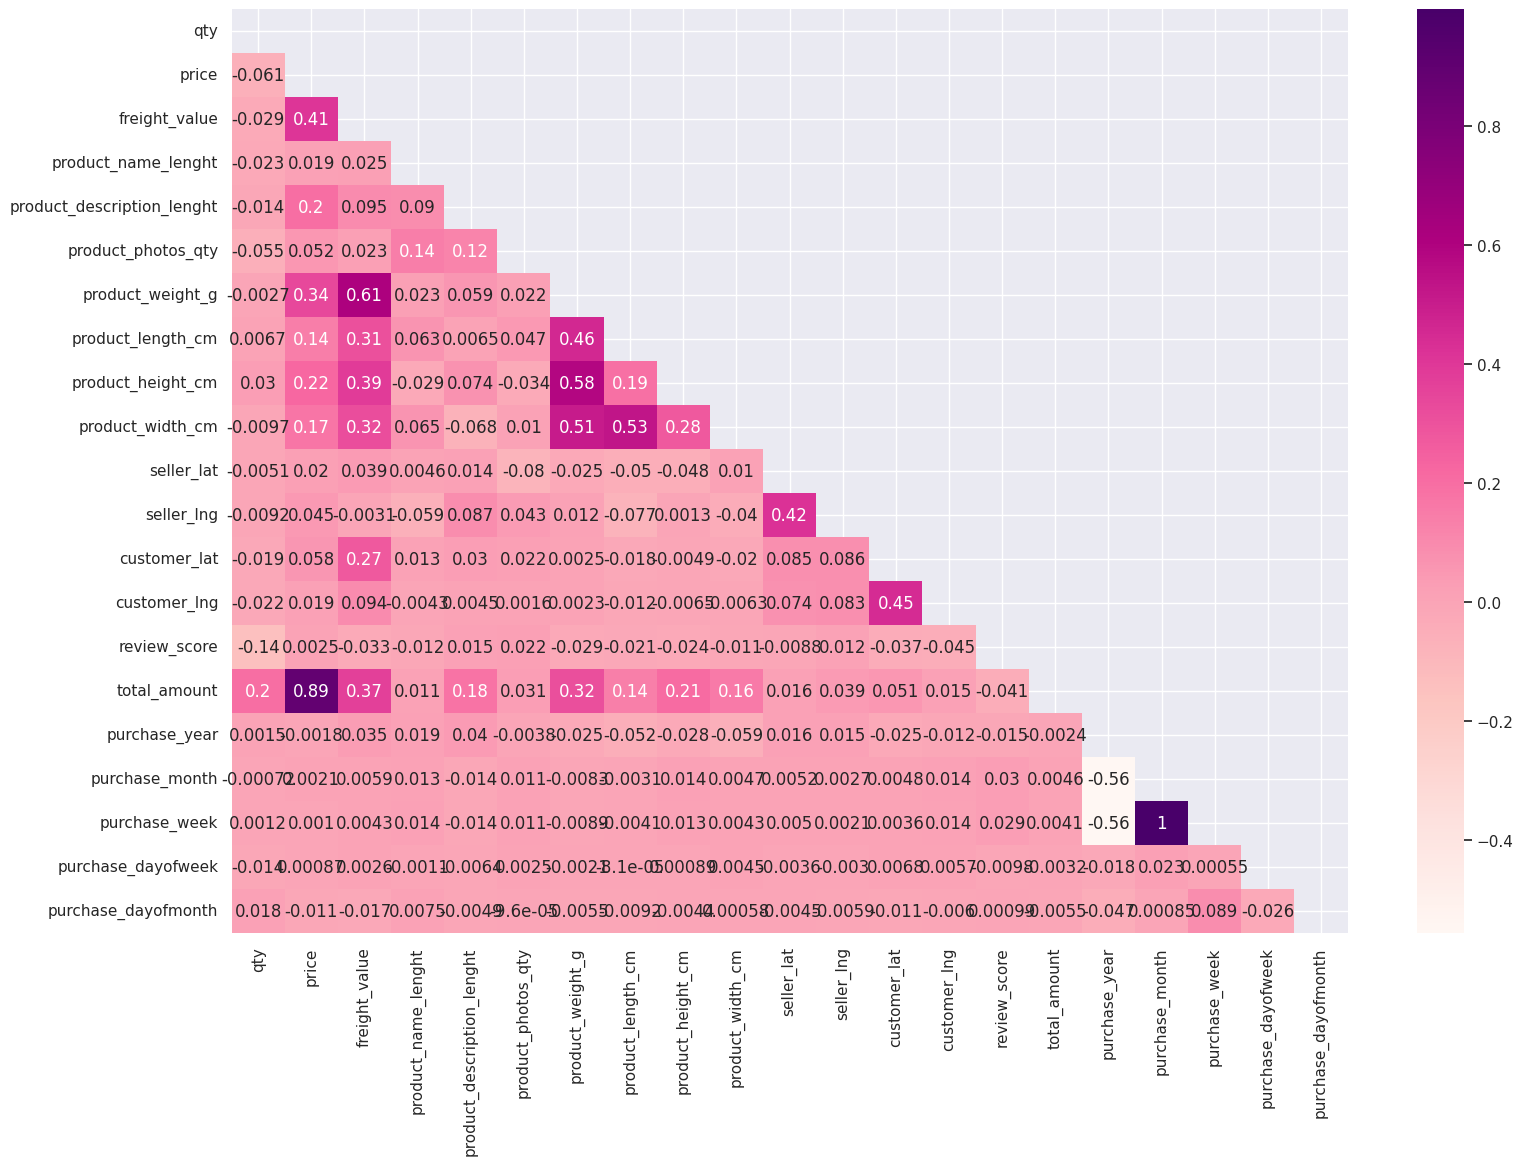

In [ ]:
#canvas size
plt.figure(figsize=(18,12))
#correlation between all columns
corr_df= master.select_dtypes(include=np.number).corr()
# creating mask
mask = np.triu(np.ones_like(corr_df.corr()))
# plotting a triangle correlation heatmap
sns.heatmap(corr_df, cmap="RdPu", annot=True, mask=mask)

#### Observation:

- We can see that total_amount is highly correlated with price. This is obvious because we know that total_amount was calculated using price.
- purchase_week and purchase_month are highly correlated.
- product_weight and freight values are positively correlated as frieght is calaculated as per product weight as it was specified by the data publishers on Kaggle.
- We don't see any other feature standing out to have high correlation with total_amount.

We will plot the histogram to see the distribution of total_amount.

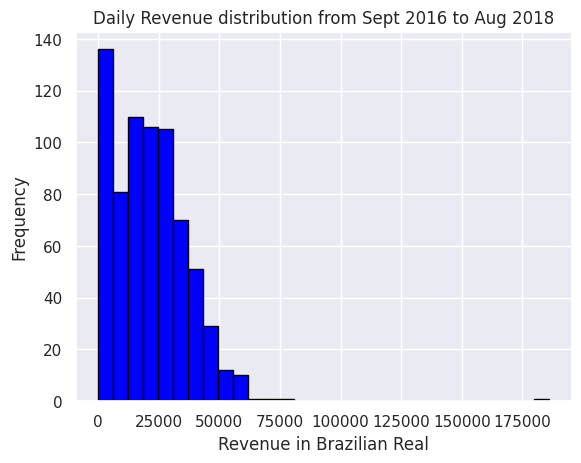

In [ ]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df_agg['total_amount'], bins=30, color='blue', edgecolor='black')

# Adding titles and labels
plt.title("Daily Revenue distribution from Sept 2016 to Aug 2018")
plt.xlabel("Revenue in Brazilian Real")
plt.ylabel("Frequency")

# Displaying the plot
plt.show()


#### Observations:

- There is a peak at zero amount because we don't have any observation for most of the days in 2016.
- If we ignore that, our overall distribution is normal with some outliers at the right side. These outlier observations are from the peak sales time.

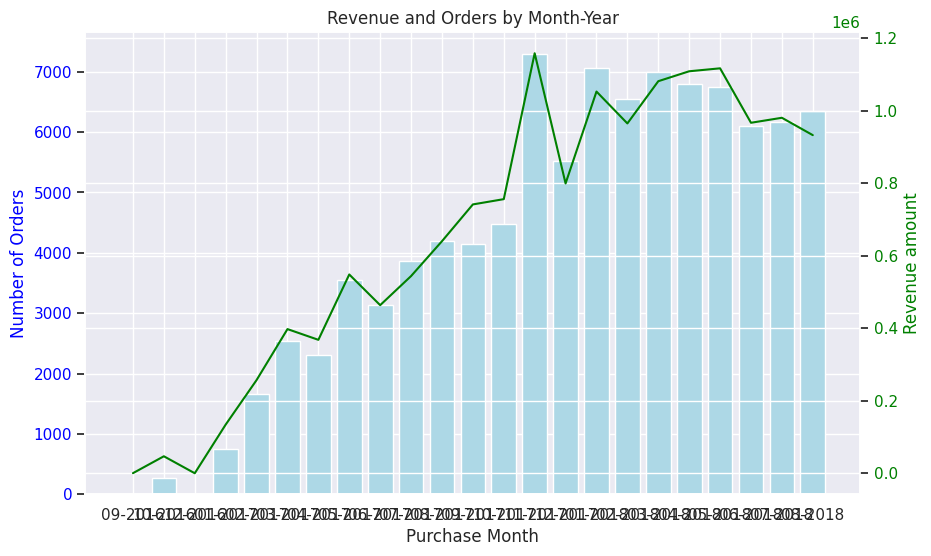

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already created your pivot table (sales_df)
sales_df = master.pivot_table(values=['order_id', 'total_amount'],
                              index=['purchase_year', 'purchase_month', 'purchase_MMYYYY'],
                              aggfunc={'order_id': 'nunique', 'total_amount': 'sum'})

# Creating a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting the number of orders as a bar plot
ax1.bar(sales_df.index.get_level_values(2), sales_df['order_id'], color='lightblue')
ax1.set_xlabel('Purchase Month')
ax1.set_ylabel('Number of Orders', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Revenue and Orders by Month-Year')

# Creating a secondary y-axis for revenue
ax2 = ax1.twinx()
ax2.plot(sales_df.index.get_level_values(2), sales_df['total_amount'], color='green')
ax2.set_ylabel('Revenue amount', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


We can see that both order made and total_amount are growing. There are some peaks that reappear after some month. The highes peak was recorded for Nov 2017.

In [ ]:
print(f"The overall revenue earned as of Aug 2018 is {df_agg['total_amount'].sum()} Brazilian Real.")

The overall revenue earned as of Aug 2018 is 15056594.420000002 Brazilian Real.


We can check what is the overall revenue for each year and what is year over year growth from 2016 to 2017 and 2017 to 2018.

In [ ]:
#checking the sale made in each year
df_agg.groupby(df_agg.index.year).sum()

total_amount
order_purchase_timestamp              
2016                          47103.67
2017                        6806689.43
2018                        8202801.32

In [ ]:
print(f'The year over year growth from 2016 to 2017 is {6722987.98/45756.84 - 1}')

The year over year growth from 2016 to 2017 is 145.9285899113663


In [ ]:
print(f'The year over year growth from 2017 to 2018 is {(8140605.72/6722987.98)-1}')

The year over year growth from 2017 to 2018 is 0.21086126350623036


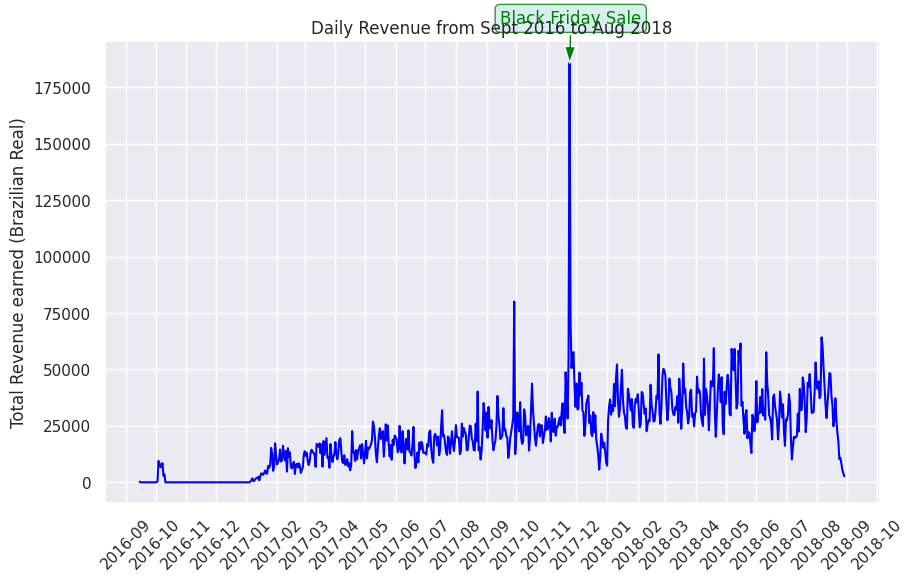

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure your index is in datetime format if it's not already
df_agg.index = pd.to_datetime(df_agg.index)

# Plotting the line chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_agg.index, df_agg['total_amount'], color='blue', label='Total Revenue')

# Setting axis labels and title
ax.set_ylabel("Total Revenue earned (Brazilian Real)")
ax.set_title("Daily Revenue from Sept 2016 to Aug 2018")

# Activating the date formatting for x-axis
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45)

# Convert the date string to a datetime object for annotation
black_friday_date = pd.to_datetime('2017-11-24')

# Annotating the peak on Black Friday Sale
ax.annotate(
    'Black Friday Sale',
    xy=(black_friday_date, 184834.17),  # Date and revenue
    xytext=(-50, 30),  # Offset position for the annotation
    textcoords='offset points',
    arrowprops=dict(facecolor='green', shrink=0.05, width=2, headwidth=8),
    fontsize=12, color='green', fontfamily='Courier New',
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="green", facecolor="#CFECEC", alpha=0.8)
)

# Displaying the plot
plt.show()


#### Observations:

- We can see that there is somewhat positive trend.
- There is almost zero sales after October 10 2016 till Jan 2017. There is a possibility that this data was captured for intial test phase.
- It looks like the business started rolling in from Jan 1 2017.
- There is a highest spike on Nov 24 2017 because it was black friday.
- There is another spike on Sept 29 2017 but I could not find the reason for it.
- Seasonality is not clear at this point.

#### Removing the observations before Jan 1 2017

Removing the data before Jan 01 2017 because there are a lot of consecutive days with zero sales. It may be because the period of Sept 2016 to Dec 2016 was an experimental phase. Including them in our model may impact our forecasting. We can find that we have continuous sales after Jan 2017.

In [ ]:
#removing the rows before Jan 01 2017
daily_data=df_agg.loc[df_agg.index>='2017-01-01', :]

In [ ]:
daily_data.tail()

total_amount
order_purchase_timestamp              
2018-08-25                    10891.40
2018-08-26                     8526.19
2018-08-27                     5587.90
2018-08-28                     4088.37
2018-08-29                     2670.54

In [ ]:
print(f"The total number of datapoint to work on :{daily_data.shape[0]}")

The total number of datapoint to work on :606


`This is challenging now to work with limited data to forecast Sales.`

In [ ]:
#saving the start and end dates separately
start_date=daily_data.index[0]
end_date=daily_data.index[-1]

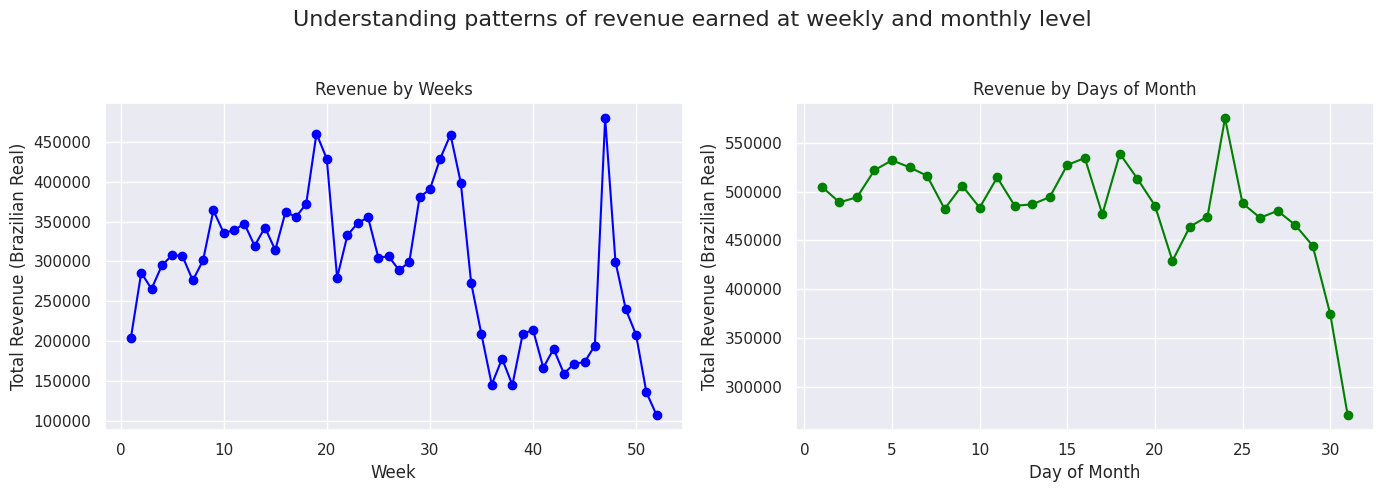

In [ ]:
import matplotlib.pyplot as plt

# Assuming df1 and df2 are already created as described:
df1 = master.groupby('purchase_week')['total_amount'].sum()
df2 = master.groupby('purchase_dayofmonth')['total_amount'].sum()

# Creating subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the weekly revenue
ax1.plot(df1.index, df1.values, color='blue', marker='o')
ax1.set_title("Revenue by Weeks")
ax1.set_xlabel("Week")
ax1.set_ylabel("Total Revenue (Brazilian Real)")

# Plotting the monthly revenue
ax2.plot(df2.index, df2.values, color='green', marker='o')
ax2.set_title("Revenue by Days of Month")
ax2.set_xlabel("Day of Month")
ax2.set_ylabel("Total Revenue (Brazilian Real)")

# Adding a main title to the entire figure
fig.suptitle("Understanding patterns of revenue earned at weekly and monthly level", fontsize=16)

# Adjusting layout for better appearance
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Display the plot
plt.show()


Let us see which categories are highest earning categories.

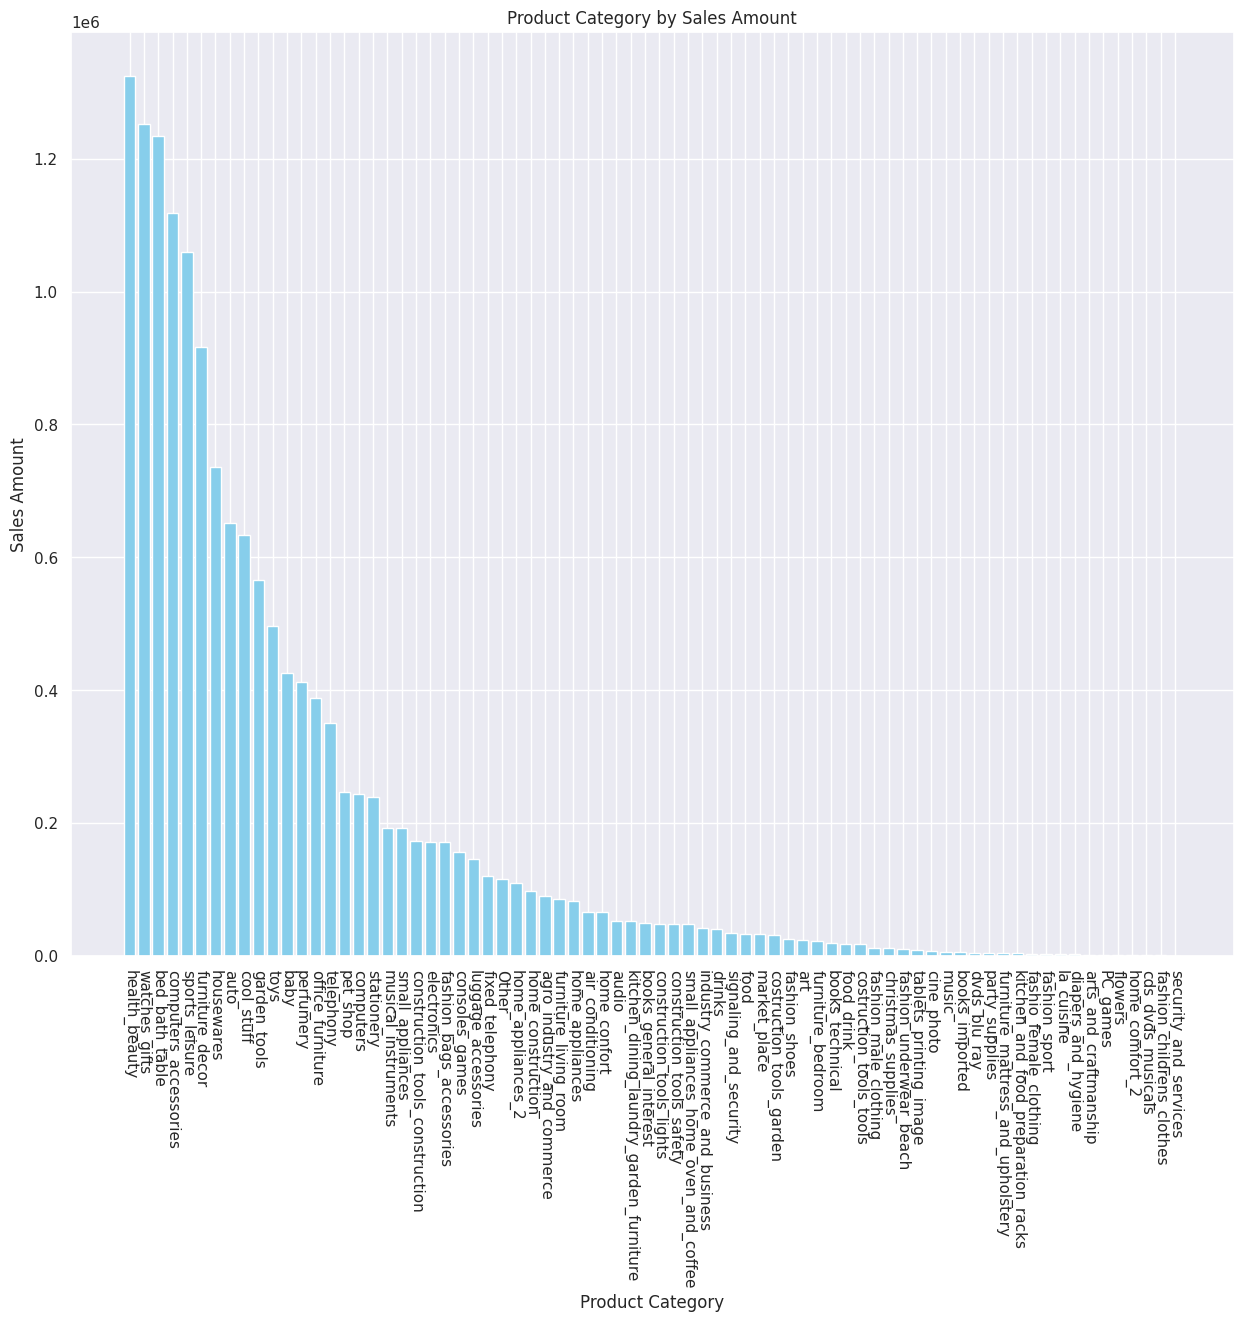

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is already created and sorted
df = master.groupby('product_category_name_english')['total_amount'].sum().sort_values(ascending=False)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(15, 12))

ax.bar(df.index, df.values, color='skyblue')

# Adding titles and labels
ax.set_xlabel('Product Category')
ax.set_ylabel('Sales Amount')
ax.set_title('Product Category by Sales Amount')

# Rotating x-axis labels for better readability
plt.xticks(rotation=-90)

# Displaying the plot
plt.show()


#### Observations:

- Health_beauty , watches_gift, bed_bath_table, computer_asscesories and sports_leisure are the top category by sales amount.
- PC_games, cds_dvds_musicals, fashion_children_clothes are the lowest earning products categories.

## 3.2 Decomposing time series

<a id="Decomposing_time_series"></a>

**We will be decomposing the time series using additive decomposition so that we can observe the underlying trend, seasonality and residuals**.

Additive Decomposition : $Trend$+$Seasonality$+$Residual$

In [ ]:
# decompose the time series
decomposition = tsa.seasonal_decompose(daily_data, model='additive')

In [ ]:
#saving copy to new datafrme
daily_df=daily_data.copy()

In [ ]:
# add the decomposition data
daily_df['Trend'] = decomposition.trend
daily_df['Seasonal'] = decomposition.seasonal
daily_df['Residual'] = decomposition.resid

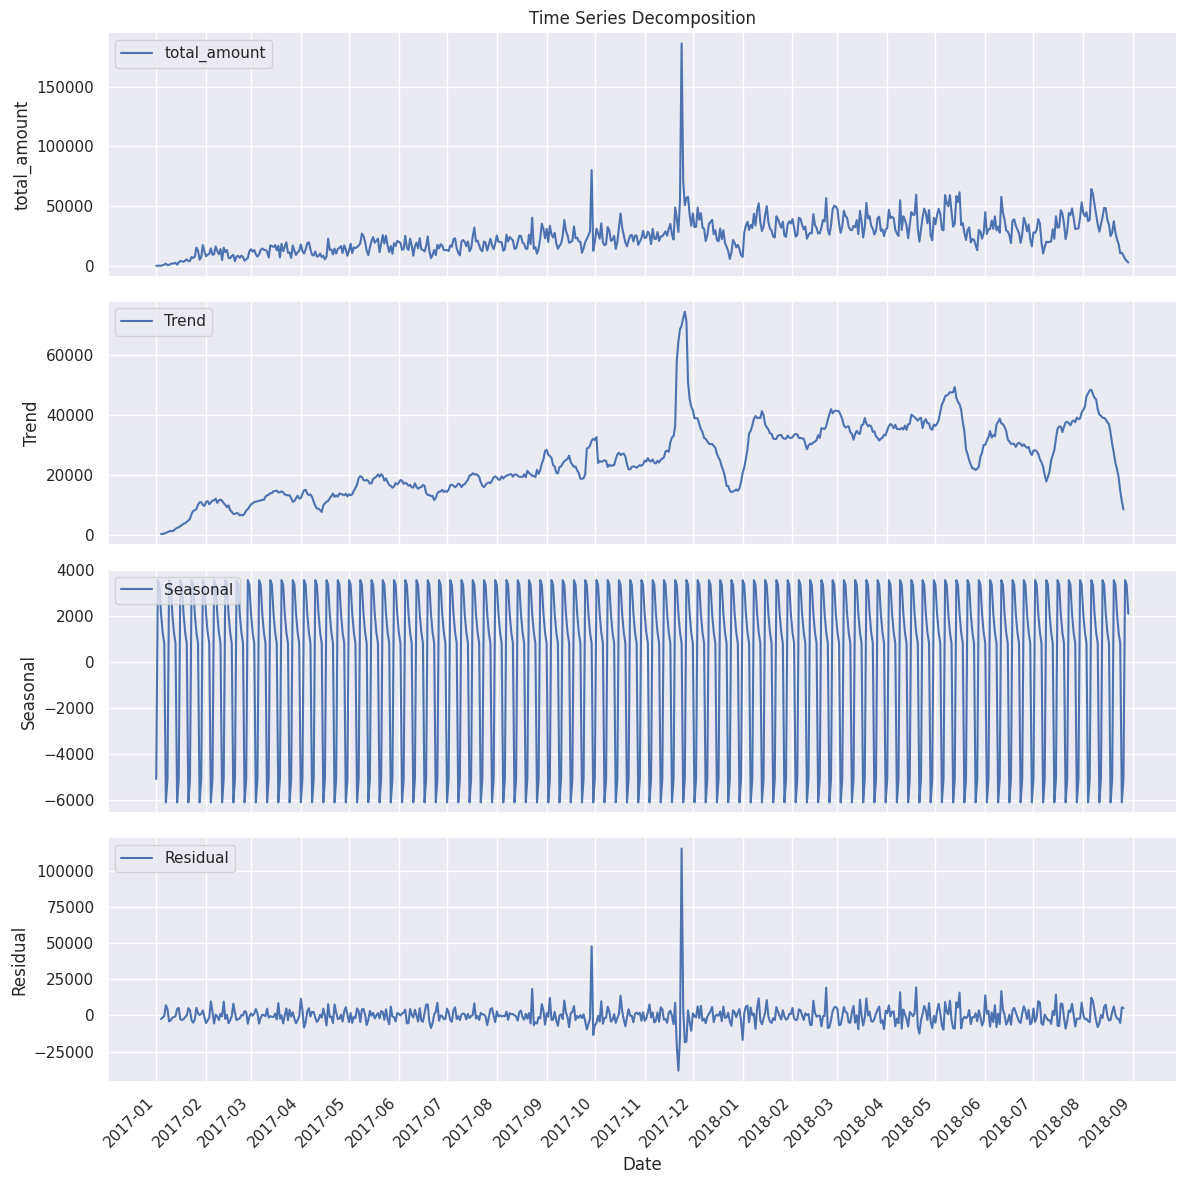

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming daily_df is your DataFrame and contains the columns: 'total_amount', 'Trend', 'Seasonal', 'Residual'
cols = ["total_amount", "Trend", "Seasonal", "Residual"]

# Create a figure with 4 subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)

# Plot each component
for i, col in enumerate(cols):
    axes[i].plot(daily_df.index, daily_df[col], label=col)
    axes[i].set_ylabel(col)
    axes[i].legend(loc='upper left')

# Set the title and labels
axes[0].set_title("Time Series Decomposition")
axes[3].set_xlabel("Date")

# Formatting x-axis for date data
axes[3].xaxis.set_major_locator(mdates.MonthLocator())
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Rotate x-axis labels for better readability
plt.setp(axes[3].xaxis.get_majorticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


#### Observation:

- We can see that there is a slightly upward trend. Trend has a peak on Nov 26, 2017 beacuse of the black friday sale on Nov 24, 2017. It falls afterwards but then rises again. Although this black friday is an outlier but we should consider it in our calculatiobn as it is an important factor.
- There is a weekly seasonlality. It peaks once in the week and then falls.
- There is no clear pattern in Residual. It has captured the peaks of Nov 24, 2017 and Sept 29, 2017.

<Axes: title={'center': 'Pattern of revenue earned at week level'}, xlabel='Weekday', ylabel='total_amount'>

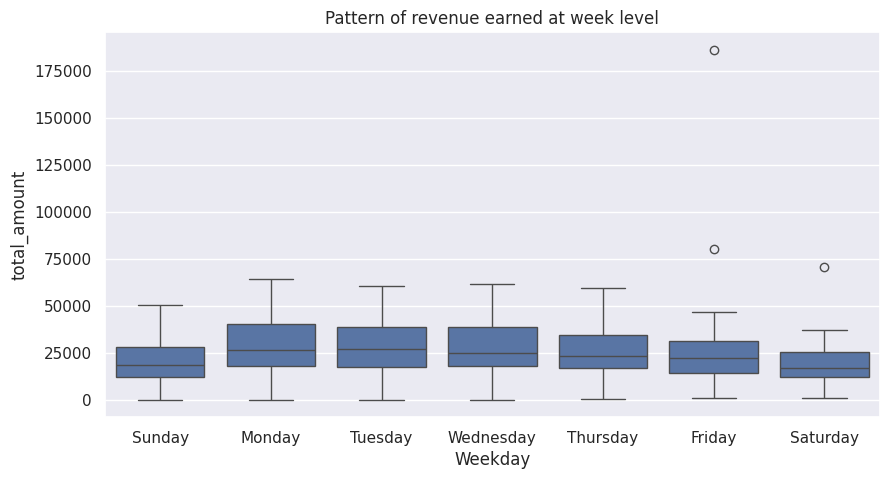

In [ ]:
plt.subplots(figsize=(10,5))
# sns.set_theme(style= 'darkgrid' )
plt.title('Pattern of revenue earned at week level')
df_week_check=daily_data.copy()
df_week_check['Weekday']= df_week_check.index.weekday
week_day=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_week_check['Weekday']=df_week_check['Weekday'].apply(lambda x: week_day[x])
sns.boxplot(data=df_week_check, x='Weekday', y='total_amount')

#### Observations:

- We can see that the amount earned is high on monday and tuesday. It decrease towards the end of week.
- There are some outliers on Friday and Saturday because of the holidays.


We can now proceed ahead with the checking stationarity of the time series so that we can apply modelling.

## 3.3 Checking stationarity

<a id="Checking_stationarity"></a>

Forecasting is bulit on assumption that historical data is representative of the future. It is important for a time series to be stationary, if it is not it means that that data changes over time and it will be hard to forecast that data.

If the mean and variance of the time series are constant that means the time series is sationary.
We will plot the rolling mean and rolling standard deviation for the time series to visually chacke for stationarity.
- A rolling average can help you find trends that would otherwise be hard to detect.
- Volatility is based on standard deviation, a measure of how much the data varies from the average - or the measure of spread.

[Reference](https://www.linkedin.com/pulse/qb4-bollinger-bands-rolling-mean-standard-deviation-alan-mcdowell/)

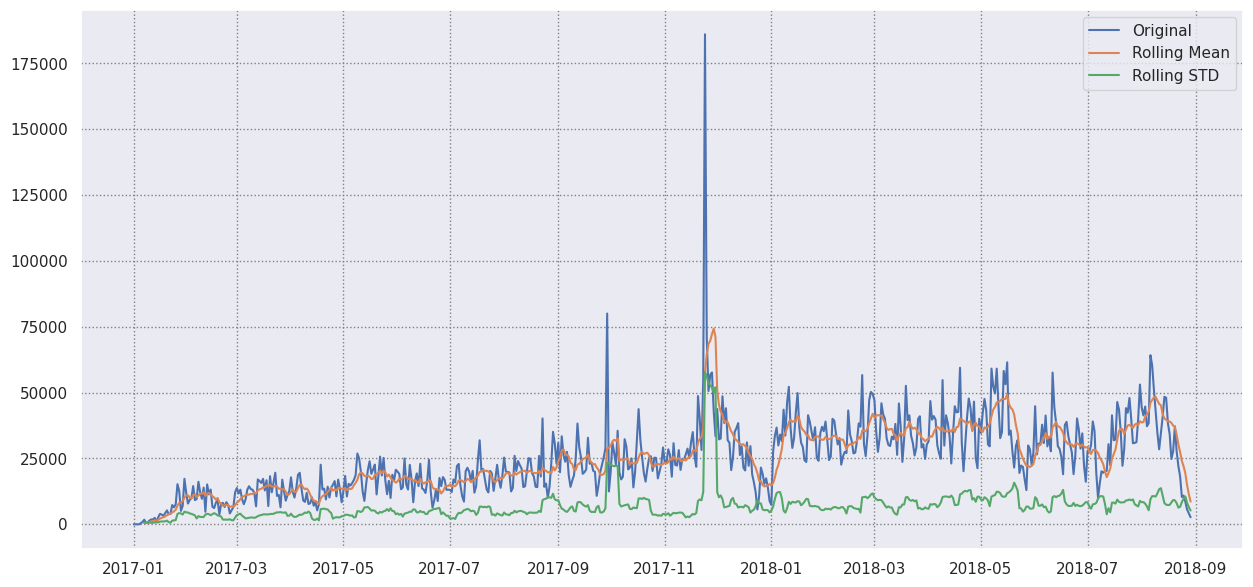

In [ ]:
#plotting rolling mean and standard deviation.

# Get Things Rolling
roll_mean = daily_df['total_amount'].rolling(window=7).mean()
roll_std = daily_df['total_amount'].rolling(window=7).std()

# Figure
fig, ax = plt.subplots(figsize=(15,7), facecolor='w')
ax.plot(daily_df['total_amount'], label='Original')
ax.plot(roll_mean, label='Rolling Mean')
ax.plot(roll_std,  label='Rolling STD')

# Legend & Grid
ax.legend(loc='upper right')
plt.grid(linestyle=":", color='grey')
plt.show()

#### Observation:
- The mean is not constant. As we progress on time series the roling mean is having somewhat upward trend.
- There rolling mean rises and falls within two month period.
- Rolling standard deviation also doesn't look constant.
- Therefore, we can say that the trend is not stationary.

### Statistical tests to check stationarity

### ADF - Augmented Dickey Fuller Test

ADF test is used to determine the presence of unit root in the series, the presence of a unit root means the time series is non-stationary. Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary. The null and alternate hypothesis of this test are:

$H_0$ : The series has a unit root.

$H_a$: The series has no unit root.

If the null hypothesis is failed to be rejected (the p-value obtained is greater than the significance level (say 0.05)), this test may provide evidence that the series is non-stationary.


### KPSS - Kwiatkowski-Phillips-Schmidt-Shin

KPSS is another test for checking the stationarity of a time series. The null and alternate hypothesis for the KPSS test are opposite that of the ADF test.

$H_0$ : The process is trend stationary.

$H_a$: The series has a unit root (series is not stationary).

In [ ]:
def perform_adf_test(df) -> None:
    """
    Augmented Dickey Fuller Test
    - The null hypothesis for this test is that there is a unit root.
    - The alternate hypothesis is that there is no unit root in the series.
    ---
    Args:
        df (pd.DataFrame): Dataframe contains the timeseries data

    Returns: None
    """

    adf_stat, p_value, n_lags, n_observ, crit_vals, icbest = adfuller(df)

    print('\nAugmented Dickey Fuller Test')
    print('---'*15)
    print('ADF Statistic: %f' % adf_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Number of observations used: {n_observ}')
    print(f'T values corresponding to adfuller test:')
    for key, value in crit_vals.items():
        print(key, value)


def perform_kpss_test(df) -> None:
    """
    Kwiatkowski-Phillips-Schmidt-Shin test for stationary.
    - The null hypothesis for the test is that the data is stationary.
    - The alternate hypothesis for the test is that the data is not stationary.
    ---
    Args:
        df (pd.DataFrame): Dataframe that contains the timeseries data

    Returns: None
    """

    kpss_stat, p_value, n_lags, crit_vals = kpss(df, nlags='auto', store=False)
    print('\nKwiatkowski-Phillips-Schmidt-Shin test')
    print('---'*15)
    print('KPSS Statistic: %f' % kpss_stat)
    print('p-value: %f' % p_value)
    print(f'Number of lags used: {n_lags}')
    print(f'Critical values of KPSS test:')
    for key, value in crit_vals.items():
        print(key, value)

#### ADF and KPSS test on original Sales amount

In [ ]:
print("ADF and KPSS test on original total_amount")
print("******************************************")
perform_adf_test(daily_df['total_amount'])
perform_kpss_test(daily_df['total_amount'])

ADF and KPSS test on original total_amount
******************************************

Augmented Dickey Fuller Test
---------------------------------------------
ADF Statistic: -3.541816
p-value: 0.006976
Number of lags used: 8
Number of observations used: 597
T values corresponding to adfuller test:
1% -3.4413510722333087
5% -2.8663934413235266
10% -2.5693547658168003

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 2.698515
p-value: 0.010000
Number of lags used: 15
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


#### Observation and findings:

*ADF & KPSS Results on Original sales data*
- Since ADF Statistic  p-value: 0.006249 < 0.05 we can reject the $H_{0}$ hypothesis in the favor of $H_{a}$
- Since KPSS Statistic p_value: 0.01 < 0.05 we can reject the $H_{0}$ hypothesis in favour of $H_{a}$.

Based on these results we can conclude that:
- **According to ADF test our series have no unit root.** Thereby, inferring that the series is stationary.
- According to KPSS test our series is not trend-stationary.

Taking refrence from [statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html#Detrending-by-Differencing) which says if :  
**KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.**

We will proceed ahead with differencing the time series and recheck for stationarity.

#### Differencing the time series

We will try to difference the series by differencing it with a previous day observation.

In [ ]:
#differencing with previous day
daily_df["day_difference"] = daily_df["total_amount"].diff(1)

In [ ]:
print("  ADF and KPSS test on differnced data  ")
print("******************************************")
perform_adf_test(daily_df["day_difference"].dropna())
perform_kpss_test(daily_df["day_difference"].dropna())

  ADF and KPSS test on differnced data  
******************************************

Augmented Dickey Fuller Test
---------------------------------------------
ADF Statistic: -9.445863
p-value: 0.000000
Number of lags used: 12
Number of observations used: 592
T values corresponding to adfuller test:
1% -3.441444394224128
5% -2.8664345376276454
10% -2.569376663737217

Kwiatkowski-Phillips-Schmidt-Shin test
---------------------------------------------
KPSS Statistic: 0.117068
p-value: 0.100000
Number of lags used: 31
Critical values of KPSS test:
10% 0.347
5% 0.463
2.5% 0.574
1% 0.739


#### Observations and findings:

*ADF & KPSS Results on differenced data*

- Since ADF Statistic  p-value: 0.000 < 0.05 we can reject the $H_{0}$ hypothesis in the favor of $H_{a}$
- Since KPSS Statistic p_value: 0.1 > 0.05 we cannot reject the $H_{0}$ hypothesis in favour of $H_{a}$.

Based on these results we can conclude that:
- **According to ADF test our series have no unit root.** Thereby, inferring that the series is stationary.
- According to KPSS test our series is not trend-stationary.

**Both tests conclude that - The series is stationary.**

We can proceed ahead with modelling.

# 4. Preparation for Modeling

<a id="Preparation_for_Modeling"></a>

We want to create some functions that we will call again and again. Hence we will be creating a test and tarin split

## 4.1 Train and test split

<a id="Train_test_split"></a>

We will be splitting the series into train and test. We will not be splitting the train for a validation set as we have a limited number of data.

In [ ]:
def train_test_split(df, train_end, test_set):
    """
    Splits input dataframe into test and train set with 80% / 20%.
    ---
    Args:
        df : dataframe to split with datetime index.
        train_end: end date of the train set (inclusive), it can be a datetime or string of format YYYY-MM-DD.
        test_end: end date of the test set

    Returns:
        train_df (pd.DataFrame): Train Dataframe
        test_df (pd.DataFrame):  Test Dataframe
    """
    train_set = df[df.index <= train_end]
    test_set = df[df.index > train_end]
    return train_set, test_set


train_end = '2018-4-30'
test_end = '2018-8-29'

train_df, test_df = train_test_split(daily_data, train_end, test_end)

In [ ]:
print(f'The Train data has time range :Shape {train_df.shape} | {train_df.index[0]} to {train_df.index[-1]}')
print(f'The Test data has time range :Shape {test_df.shape} | {test_df.index[0]} to {test_df.index[-1]}' )

The Train data has time range :Shape (485, 1) | 2017-01-01 00:00:00 to 2018-04-30 00:00:00
The Test data has time range :Shape (121, 1) | 2018-05-01 00:00:00 to 2018-08-29 00:00:00


## 4.2 Defining functions for plotting predictions and forecast

<a id="plotting_func"></a>

In [ ]:
import matplotlib.pyplot as plt

def plot_forecast(train_set, test_set, fc_series: pd.Series) -> None:
    """
    This function plots the train, test, and forecast values.
    ---
    Args:
        train_set:  training series with datetime index
        test_set:  test series with datetime index
        fc_series: forecast series with datetime index

    Returns: None
    """

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the training, test, and forecast series
    ax.plot(train_set.index, train_set.values, label='Train', color='blue')
    ax.plot(test_set.index, test_set.values, label='Test', color='orange')
    ax.plot(fc_series.index, fc_series.values, label='Forecast', color='green')

    # Adding titles and labels
    ax.set_title("Daily Sales Amount and Forecast")
    ax.set_xlabel("Date")
    ax.set_ylabel("Revenue Amount")

    # Adding legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_test_predictions(test_set, predictions) -> None:
    """
    This function plots test set vs predicted values.
    ---
    Args:
        test_set: Test series with datetime index and values
        predictions: Prediction values (array, list, or series) with the same index as test_set

    Returns: None
    """

    # Ensure both inputs are pandas Series with the same index
    if not isinstance(test_set, pd.Series):
        test_set = pd.Series(test_set, index=predictions.index)
    if not isinstance(predictions, pd.Series):
        predictions = pd.Series(predictions, index=test_set.index)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot the test set and predictions
    ax.plot(test_set.index, test_set.values, label='Test', color='blue')
    ax.plot(predictions.index, predictions.values, label='Predictions', color='red', linestyle='--')

    # Adding titles and labels
    ax.set_title("Daily Revenue Amount: Test vs Predictions")
    ax.set_xlabel("Date")
    ax.set_ylabel("Revenue Amount")

    # Adding legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


## 4.3 Defining functions for evaluation

<a id="evaluation_metrics"></a>

Throughout this notebook we will be using these two function to evaluate the performance of our model. We will be defining functions to calculate MAPE and RMSE. If we have Y as actual value and Predictions as predicted value for n number of observations then:

MAPE (Mean Absolute Percentage Error): It is a simple average of absolute percentage errors. It is calculated by

$$ \frac{1}{n} \sum_{i=1}^{n} {| \frac{Y_{actual_i} - Predictions_{i}}{Y_{actual_i}} |} \times{100} $$

RMSE (Root Mean Sqaured Error) : It is the square root of the average of the squared difference between the original and predicted values in the data set.

$$ \sqrt{\frac{1}{n} \sum_{i=1}^{n} {{(Y_{actual_i} - Predictions_{i})}^2 }} $$

In [ ]:
def mape_metrics(test_set, predicted) -> float:
    """
    This function calculates the MAPE.
    ---
    Args:
        test_set (pd.Series):  test set filtered series with y
        predicted (pd.Series):  predicted series

    Returns: float MAPE percentage
    """
    # Calculate the MAPE value and return
    mape_result=round(np.mean(np.abs((test_set - predicted) / test_set)) * 100, 2)
    return mape_result

def rmse_metrics(test_set, predicted) -> float:
    """
    This function calculates the RMSE.
    ---
    Args:
        test_set (pd.Series):  test set filtered series with y
        predicted (pd.Series):  predicted series

    Returns: float RMSE
    """
    # Calculate the MAPE value and return
    return round(np.sqrt(np.mean((test_set - predicted)**2)),2)

# 5. Modelling (SARIMA)

<a id="SARIMA"></a>

We will start with SARIMA model to account for the seasonality in our model. SARIMA is Seasonal Autoregressive Integrated Moving Average, which explicitly supports univariate time series data with a seasonal component. Before jumping on to modelling, we need to get a basic understanding of what orders for Auto gregressive and Moving average to choose. We will plot the ACF and PACF plots to find it out.

ACF : Auto correlation function, describes correlation between original and lagged series.
PACF : Partial correlation function is same as ACF but it removes all intermediary effects of shorter lags, leaving only the direct effect visible.

## 5.1 Plotting ACF and PACF plot

<a id="ACF_PACF"></a>

In [ ]:
def plot_acf_pacf(df, acf_lags: int, pacf_lags: int) -> None:
    """
    This function plots the Autocorrelation and Partial Autocorrelation lags.
    ---
    Args:
        df (pd.DataFrame): Dataframe contains the order count and dates.
        acf_lags (int): Number of ACF lags
        pacf_lags (int): Number of PACF lags
    Returns: None
    """

    # Figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,9), facecolor='w')

    # ACF & PACF
    plot_acf(df, ax=ax1, lags=acf_lags)
    plot_pacf(df, ax=ax2, lags=pacf_lags, method='ywm')

    # Labels
    ax1.set_title(f"Autocorrelation {df.name}", fontsize=15, pad=10)
    ax1.set_ylabel("Sales amount", fontsize=12)
    ax1.set_xlabel("Lags (Days)", fontsize=12)

    ax2.set_title(f"Partial Autocorrelation {df.name}", fontsize=15, pad=10)
    ax2.set_ylabel("Sales amount", fontsize=12)
    ax2.set_xlabel("Lags (Days)", fontsize=12)

    # Legend & Grid
    ax1.grid(linestyle=":", color='grey')
    ax2.grid(linestyle=":", color='grey')

    plt.show()

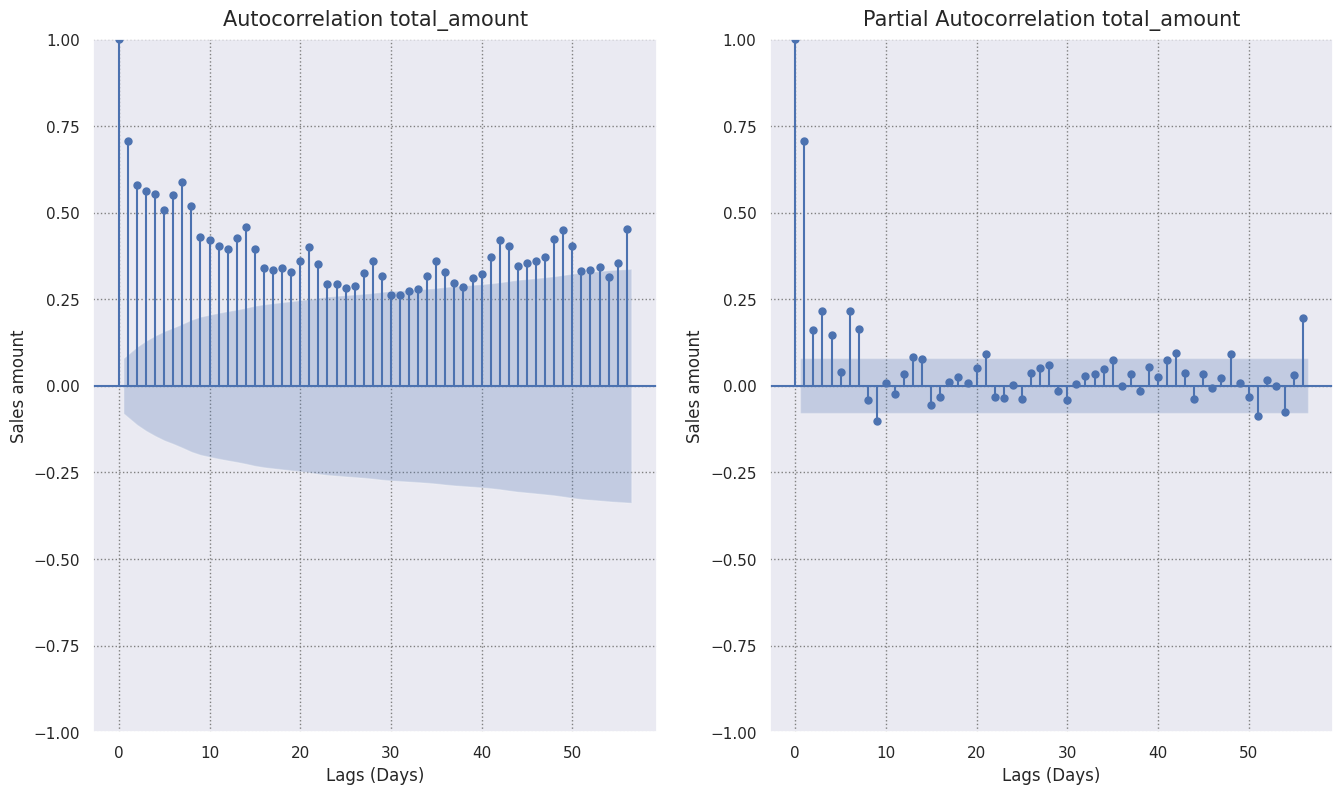

In [ ]:
#plotting the ACF and PACF plot for original series
plot_acf_pacf(daily_df['total_amount'], acf_lags=56, pacf_lags= 56)

#### Observation:

ACF plot:
 - It shows that there are a lot of significant lags. *In ACF plot none of the lags are becoming zero.* **It means that our data is not stationary as we have explained using statistic test and observation of rolling mean and standard deviation.**
 - It will be hard to determing the AR and MA order, we will need to difference it so that we can identify some significant lags.
 - We can see that Lag peaks after evry 7 days. This is the seasonlity of the model.
    
PACF plot:
 - PACF model has a few significant lags but the plot is not decaying much and has a very little oscillation. So it is hard to say or identify if moving averages can be utilized on this model.

We will try to plot the ACF and PACF plot by double differncing means differencing the day_difference with seasonal differnce data.

In [ ]:
#double differencing the column total_amount
daily_df['double_difference'] = daily_df['day_difference'].diff(7)

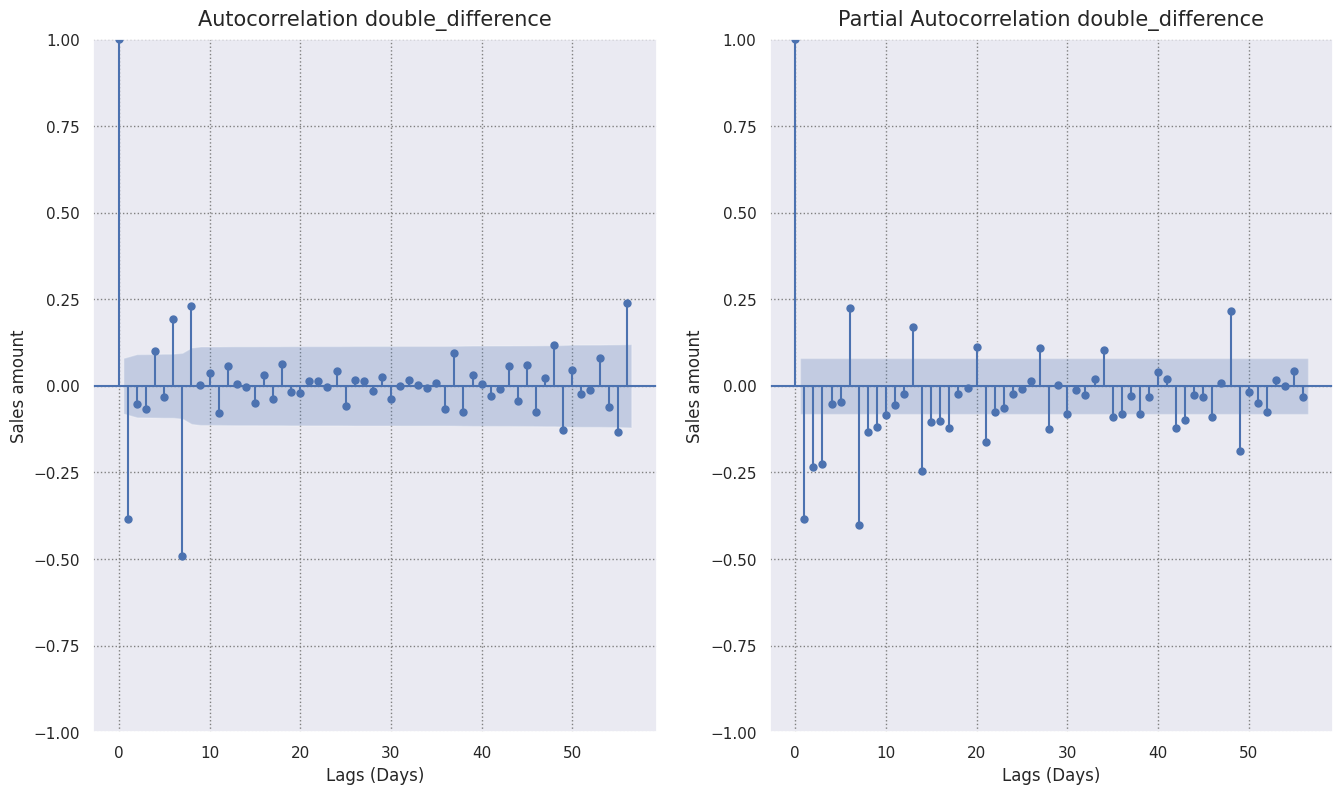

In [ ]:
#plotting the ACF and PACF plot for double differenced series
plot_acf_pacf(daily_df['double_difference'].dropna(), acf_lags=56, pacf_lags= 56)

#### Observation:

It little difficult to tell, what values of  p and  q are appropriate for the data but we will try to find the appropriate orders.

ACF plot:
- A lot of lags have become zero now. There are few lags that are significant 1, 4, 6, 7 and 8.
- We can use non seasonal MA of order 1, 4, 6 but the most significant lag is 1.
- The lag at 7 is also important and can help determing the seasonal MA component.

PACF plot:
- It shows signigicant peaks at every seasonal lag of 7 days and peaks are diminishing. Also the non-seasonal lags are also diminishing. So we can use seasonl and non-seasonal MA components in model. The MA components can be determined using the significant lags from ACF plot.
- Apart from seasonl lags, the lag of 1, 2 and 3 are also significant. We can one of these lags for our non-seasonl AR component.

## 5.2 Applying SARIMA model  <a name="Baseline"></a>
---

The SARIMA model is specified

$$SARIMA(p, d, q) \times (P, D, Q)_s$$

Where:
- Trend Elements are:
    - p: Autoregressive order
    - d: Difference order
    - q: Moving average order
- Seasonal Elements are:
    - P: Seasonal autoregressive order.
    - D: Seasonal difference order. D=1 would calculate a first order seasonal difference
    - Q: Seasonal moving average order. Q=1 would use a first order errors in the model
    - s: Single seasonal period

#### Theoretical estimates:
- **s**: In our PACF plot there is peak that reappears every 7 days. Thus, we can set seasonal period to **s = 7**. This also backed by our seasonal component after additive decomposition.
- **p**: We observed that there is some tappering in ACF plot and we found the significant lags of 1,2,3 from PACF plot. We can start with **p=1** and see how it works.
- **d**: We observed that our series has some trend, so we can remove it by differencing, so **d = 1**.
- **q**: Based on our ACF correlations we can set **q = 1** since its the most significant lag.
- **P**: **P = 0** as we are using ACF plot to find seasonl significant lag.
- **D**: Since we are dealing with seasonality and we need to differnce the series, **D = 1**
- **Q**: The seasonal moving average will be set to **Q = 1** as we found only one significant seasonal lag in ACF plot.
Here we go:

$$ SARIMA(1, 1, 1) \times (0, 1, 1)_{7} $$

### Baseline Sarima Model

In [ ]:
# Set Hyper-parameters
p, d, q = 1, 1, 1
P, D, Q = 0, 1, 1
s = 7

# Fit SARIMA
sarima_model = SARIMAX(train_df['total_amount'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_model_fit = sarima_model.fit(disp=0)
print(sarima_model_fit.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      total_amount   No. Observations:                  485
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -5048.473
Date:                           Sat, 10 Aug 2024   AIC                          10104.947
Time:                                   20:21:06   BIC                          10121.617
Sample:                               01-01-2017   HQIC                         10111.501
                                    - 04-30-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2492      0.044      5.619      0.000       0.162       0.336
ma.L1         -0.8473      0.032    -26.617

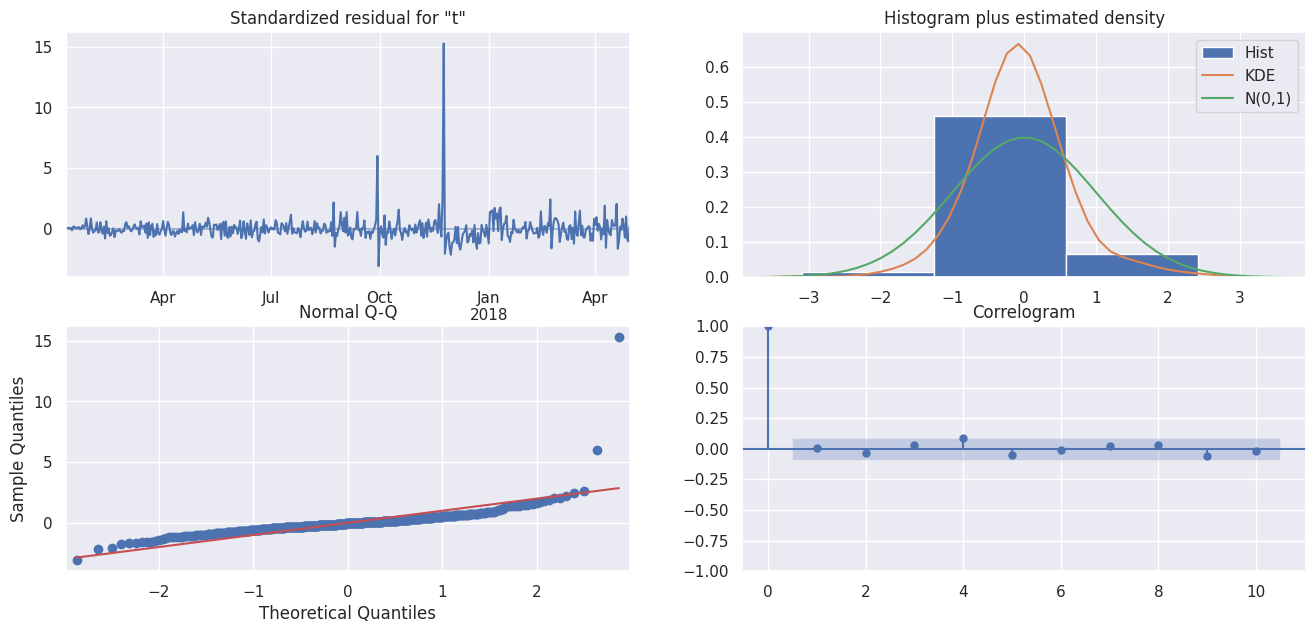

In [ ]:
# Plot diagnostics
sarima_model_fit.plot_diagnostics(figsize=(16,7))
plt.show()

#### Observations:
- **The standardize residual plot:**  The residuals appear as white noise. It looks like the residual of the decomposed time series.
- **The Normal Q-Q-plot:** Shows that the ordered distribution of residuals follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). There are some outlier as we have seen earlier.
- **Histogram and estimated density plot:**  The KDE follows the N(0,1) line however with noticeable differences. As mentioned before our distribution has heavier tails.
- **The Correlogram plot:** Shows that the time series residuals have low correlation with lagged versions of itself. Meaning there are no patterns left to extract in the residuals.

Lets test the model on our training set:

## 5.3 Plotting predictions and evaluating SARIMA model
<a id="plot"></a>

#### Prediction using SARIMA

In [ ]:
# defining prediction period
pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

sarima_predictions = sarima_model_fit.predict(start=pred_start_date, end=pred_end_date)
sarima_residuals = test_df['total_amount'] - sarima_predictions

#### Evaluation of SARIMA

In [ ]:
# Get evaluation data
sarima_root_mean_squared_error = rmse_metrics(test_df['total_amount'], sarima_predictions)
sarima_mape_error = mape_metrics(test_df['total_amount'], sarima_predictions)

print(f'Root Mean Squared Error | RMSE: {sarima_root_mean_squared_error}')
print(f'Mean Absolute Percentage Error | MAPE: {sarima_mape_error}')

Root Mean Squared Error | RMSE: 13773.5
Mean Absolute Percentage Error | MAPE: 68.73


We are able to get a MAPE of 69.99 % and RMSE of 13810.6.

#### Plotting test and prediction

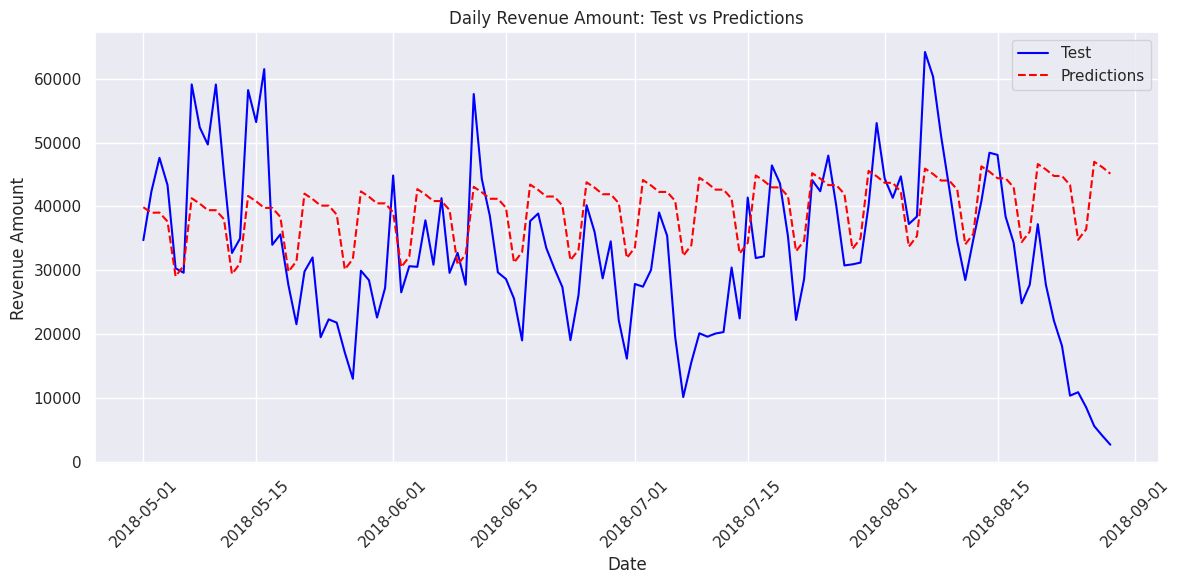

In [ ]:
plot_test_predictions(test_df['total_amount'], sarima_predictions)

#### Observations:

Our baseline model is able to capture the seasonality and trend component but is not able to pick up the variations between weeks. The MAPE is also very high.

### Sarima Forecast

We will try to forecast the sales for next 180 days. We have the 121 days known from our test data and we will try to see what our model forcasts for next 60 days.

In [ ]:
# Forecast Window
days = 180

sarima_forecast = sarima_model_fit.forecast(days)
sarima_forecast_series = pd.Series(sarima_forecast, index=sarima_forecast.index)

# Since negative orders are not possible we can trim them.
sarima_forecast_series[sarima_forecast_series < 0] = 0

#### Plotting Forecast using baseline SARIMA

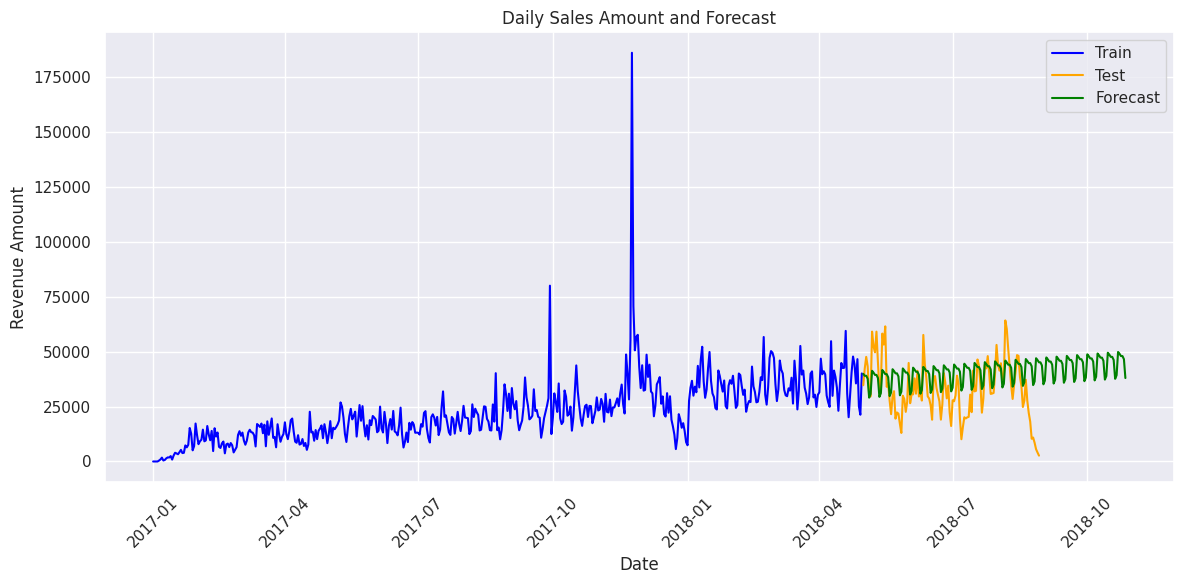

In [ ]:
plot_forecast(train_df['total_amount'], test_df['total_amount'], sarima_forecast_series)

#### Observations:

- The model predicts the overall daily patterns pretty well.
- Is not performning well to pick up the variation between weeks and months.
- It positively trending and is not capturing the peaks and toughs.
- We will need to tune it further and should also add another feature holiday so that it can pick some informations from that.
- While this model doesn't have a great long term predictive power it can serve as a solid baseline for our next models.

## 5.4 Adding Exogenous variable holiday for SARIMAX

<a id="SARIMAX"></a>

Let us include the exogenous variable holiday to imporve our model.

In [ ]:
#reading the data from holiday file
holiday=pd.read_csv('/content/drive/MyDrive/Project/holiday.csv', index_col=0)

In [ ]:
#reading head
holiday.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 2017-01-01 to 2018-12-25
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   is_holiday  36 non-null     float64
dtypes: float64(1)
memory usage: 576.0+ bytes


In [ ]:
#converting index to date time format
holiday.index=pd.to_datetime(holiday.index)

In [ ]:
#reading head
holiday.head()

is_holiday
2017-01-01         1.0
2017-02-27         1.0
2017-02-28         1.0
2017-03-01         1.0
2017-04-14         1.0

Our holiday dataframe only has dates when there is a holiday but not all the dates. We can fill the missing dates and change the is_holiday column to int format.

In [ ]:
#fill the missing dates
idx = pd.date_range('2017-01-01', '2018-12-31')
holiday = holiday.reindex(idx, fill_value=0)

#converting is_holiday column to int type
holiday['is_holiday']=holiday['is_holiday'].astype(int)

In [ ]:
#checking the info
holiday.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2017-01-01 to 2018-12-31
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   is_holiday  730 non-null    int64
dtypes: int64(1)
memory usage: 11.4 KB


Since our data has impact of balck friday we can add few holidays like valentine day and black friday day as holiday.

In [ ]:
#adding some more days as holidays like valentine day and black friday
#feb 14, Nov 24 2017 and Nov-23 2018
holiday.loc[((holiday.index.day== 14) & (holiday.index.month==2)),:]=1
holiday.loc[((holiday.index== '2017-11-24') | (holiday.index== '2018-11-23') ),:]=1

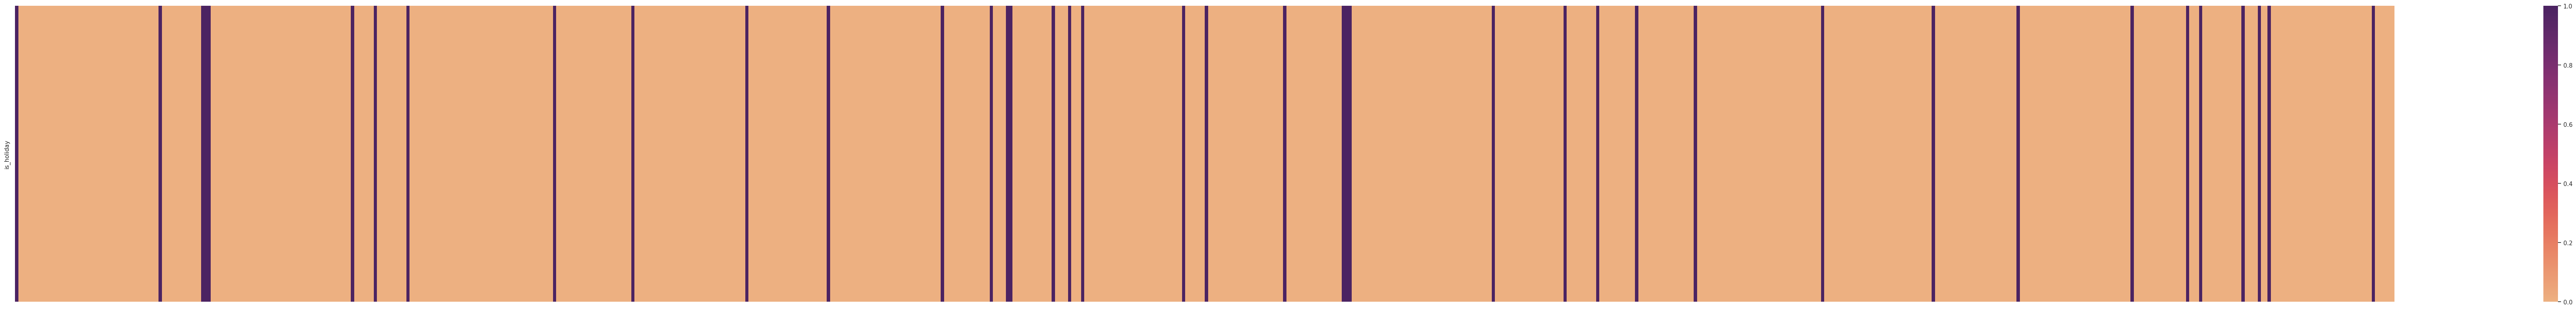

In [ ]:
#plot to show holidays
plt.figure(figsize=(100,10))
sns.heatmap(holiday.T, cmap="flare", xticklabels=[])
plt.show()

In [ ]:
#filter ing the holidays only upto the end of our test data period.
holiday_df=holiday.loc[holiday.index<='2018-08-29']

In [ ]:
#adding the holiday data to our new dataframe.
dfex=pd.concat([daily_data, holiday_df], axis=1)

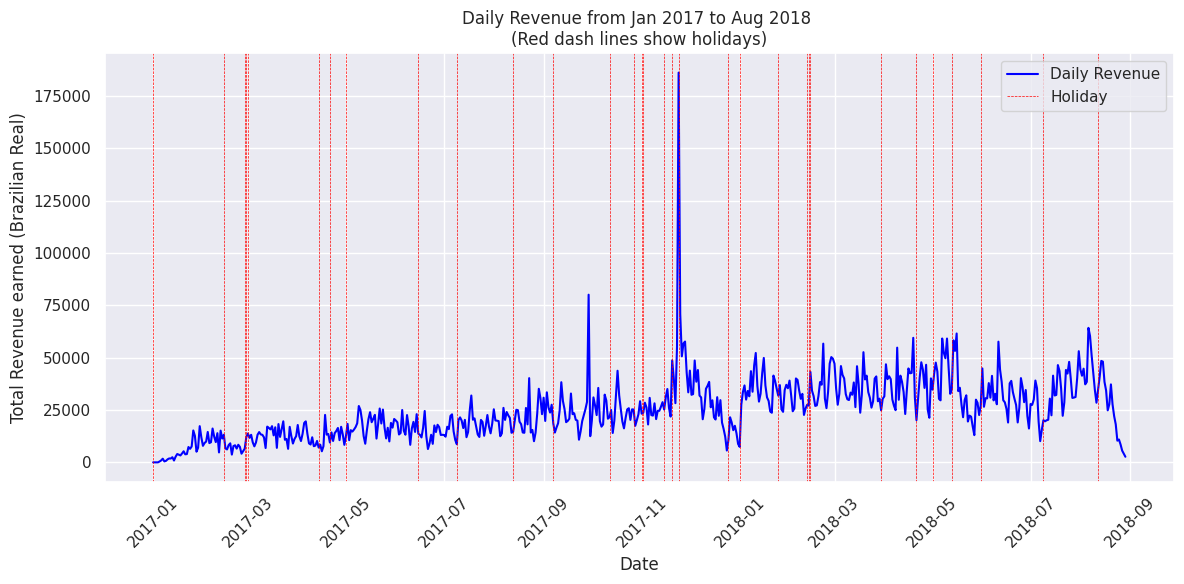

In [ ]:
import matplotlib.pyplot as plt

def plot_daily_revenue_with_holidays(dfex) -> None:
    """
    Plot daily revenue with vertical lines for holidays.
    ---
    Args:
        dfex: DataFrame containing columns 'total_amount' and 'is_holiday'

    Returns: None
    """

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot daily revenue
    ax.plot(dfex.index, dfex['total_amount'], label='Daily Revenue', color='blue')

    # Add vertical lines for holidays
    holidays = dfex[dfex['is_holiday'] == 1].index
    for holiday in holidays:
        ax.axvline(x=holiday, color='red', linestyle='--', linewidth=0.5, label='Holiday' if 'Holiday' not in ax.get_legend_handles_labels()[1] else "")

    # Adding titles and labels
    ax.set_title("Daily Revenue from Jan 2017 to Aug 2018 \n(Red dash lines show holidays)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Total Revenue earned (Brazilian Real)")

    # Adding legend
    ax.legend()

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function
plot_daily_revenue_with_holidays(dfex)


### SARIMAX using an Exogenous variable

We can split the df into test and train so that we can do some modelling on it.

In [ ]:
#splitting into test and train
train_dfex, test_dfex = train_test_split(dfex, train_end, test_end)

## 5.5 Applying grid search on SARIMAX with exogenous variable

<a id="Grid_search"></a>

In [ ]:
#instantiating order variables
p = range(1, 5)
d = range(1,2)
q = range(1, 3)
s = 7

P=range(0,1)

D=range(1,2)
Q=range(1,3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq=list(itertools.product(P, D, Q))
seasonal_PDQS= [(x[0], x[1], x[2], s) for x in seasonal_pdq]


def grid_search_sarimax(train_set, test_set) -> None:
    """
    This function perform a grid search for SARIMAX model Hyper-Parameters.
    ---
    Args:
        train_set (pd.DataFrame): Training set for grid search.

    Returns: None
    """
    # Supress UserWarnings
    warnings.simplefilter('ignore', category=UserWarning)

    #instantiating variables
    pred_start_date = test_set.index[0]
    pred_end_date = test_set.index[-1]
    summary=pd.DataFrame(columns=['Model', 'AIC', 'BIC', 'MSE', 'SSE', 'RMSE', 'MAPE'])
    data={}
    # Grid Search
    for order in pdq:
        for seasonal_order in seasonal_PDQS:
            model = SARIMAX(train_set['total_amount'],
                            order=order,
                            seasonal_order=seasonal_order,
                            exog=(train_set[['is_holiday']]))
            results = model.fit(disp=0)
            predictions = results.predict(start=pred_start_date, end=pred_end_date,
                                          exog=(test_set[['is_holiday']]))

            data= { "Model":f'{order}x{seasonal_order}',
                    "AIC":results.aic,
                    "BIC":results.bic,
                    "MSE":results.mse,
                    "SSE":results.sse,
                    "RMSE": rmse_metrics(test_set['total_amount'], predictions),
                    "MAPE": mape_metrics(test_set['total_amount'], predictions) }

            summary=pd.concat([summary, pd.DataFrame(data, columns=summary.columns, index=[1])], ignore_index=True)

    return summary


grid_search_sarimax(train_dfex, test_dfex)

Model           AIC           BIC           MSE  \
0   (1, 1, 1)x(0, 1, 1, 7)  10110.438533  10131.276116  8.794199e+07   
1   (1, 1, 1)x(0, 1, 2, 7)  10108.785806  10133.790905  8.784103e+07   
2   (1, 1, 2)x(0, 1, 1, 7)  10109.513235  10134.518334  8.807237e+07   
3   (1, 1, 2)x(0, 1, 2, 7)  10197.403283  10226.575898  8.849435e+07   
4   (2, 1, 1)x(0, 1, 1, 7)  10112.384603  10137.389702  8.734937e+07   
5   (2, 1, 1)x(0, 1, 2, 7)  10195.044444  10224.217059  8.847710e+07   
6   (2, 1, 2)x(0, 1, 1, 7)  10099.688342  10128.860957  8.520741e+07   
7   (2, 1, 2)x(0, 1, 2, 7)  10198.842586  10232.182718  8.846571e+07   
8   (3, 1, 1)x(0, 1, 1, 7)  10191.561057  10220.733672  8.630679e+07   
9   (3, 1, 1)x(0, 1, 2, 7)  10192.764704  10226.104836  8.587066e+07   
10  (3, 1, 2)x(0, 1, 1, 7)  10190.522343  10223.862475  8.545478e+07   
11  (3, 1, 2)x(0, 1, 2, 7)  10192.251206  10229.758854  8.524754e+07   
12  (4, 1, 1)x(0, 1, 1, 7)  10190.301166  10223.641298  8.538278e+07   
13  (4, 1, 1)x(0, 1, 2, 7)  10191.731836  10229.239484  8.504294e+07   
14  (4, 1, 2)x(0, 1, 1, 7)  10183.254010  10220.761658  8.527790e+07   
15  (4, 1, 2)x(0, 1, 2, 7)  10184.052695  10225.727860  8.469659e+07   

             SSE      RMSE   MAPE  
0   4.265187e+10  16287.81  82.07  
1   4.260290e+10  14150.10  70.54  
2   4.271510e+10  13761.84  68.33  
3   4.291976e+10  13409.10  66.17  
4   4.236444e+10  16683.26  84.32  
5   4.291139e+10  13471.27  66.56  
6   4.132559e+10  16013.22  80.58  
7   4.290587e+10  13532.78  66.94  
8   4.185879e+10  14999.20  75.26  
9   4.164727e+10  15105.10  75.80  
10  4.144557e+10  15144.98  75.97  
11  4.134505e+10  15190.60  76.21  
12  4.141065e+10  15098.45  75.74  
13  4.124583e+10  15189.07  76.21  
14  4.135978e+10  15161.67  76.09  
15  4.107785e+10  15263.88  76.59

SARIMA Order (1,1,2) x (0, 1,1,7) gives the minimum MAPE and RMSE on the test data. We will chose this model as a better model over our baseline.

#### Fitting the model on tuned SARIMAX

In [ ]:
# Set Hyper-parameters
p, d, q = 1, 1, 2
P, D, Q = 0, 1, 1
s = 7

# Fit SARIMA
sarimax_model = SARIMAX(train_dfex['total_amount'],
                       order=(p, d, q),
                       seasonal_order=(P, D, Q, s),
                       exog=(train_dfex[['is_holiday']]))
sarimax_model_fit = sarimax_model.fit(disp=0)
print(sarimax_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        total_amount   No. Observations:                  485
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 7)   Log Likelihood               -5048.757
Date:                             Sat, 10 Aug 2024   AIC                          10109.513
Time:                                     20:22:42   BIC                          10134.518
Sample:                                 01-01-2017   HQIC                         10119.345
                                      - 04-30-2018                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
is_holiday  4534.5997   1057.756      4.287      0.000    2461.435    6607.764
ar.L1          0.0720      

## 5.6 Plotting predictions and evaluating SARIMAX model

<a id="plot_sarimax"></a>

#### Prediction using tuned SARIMAX

In [ ]:
#predicting
pred_start_date = test_df.index[0]
pred_end_date = test_df.index[-1]

sarimax_predictions = sarimax_model_fit.predict(start=pred_start_date, end=pred_end_date, exog=(test_dfex[['is_holiday']]) )

#### Evaluation of tuned SARIMAX

In [ ]:
sarimax_root_mean_squared_error = rmse_metrics(test_dfex['total_amount'], sarimax_predictions)
sarimax_mape=mape_metrics(test_dfex['total_amount'], sarimax_predictions)

print(f'Root Mean Squared Error | RMSE: {sarimax_root_mean_squared_error}')
print(f'Mean Absolute Percentage Error | MAPE: {sarimax_mape}')

Root Mean Squared Error | RMSE: 13761.84
Mean Absolute Percentage Error | MAPE: 68.33


#### Plotting test and predictions of tuned SARIMAX

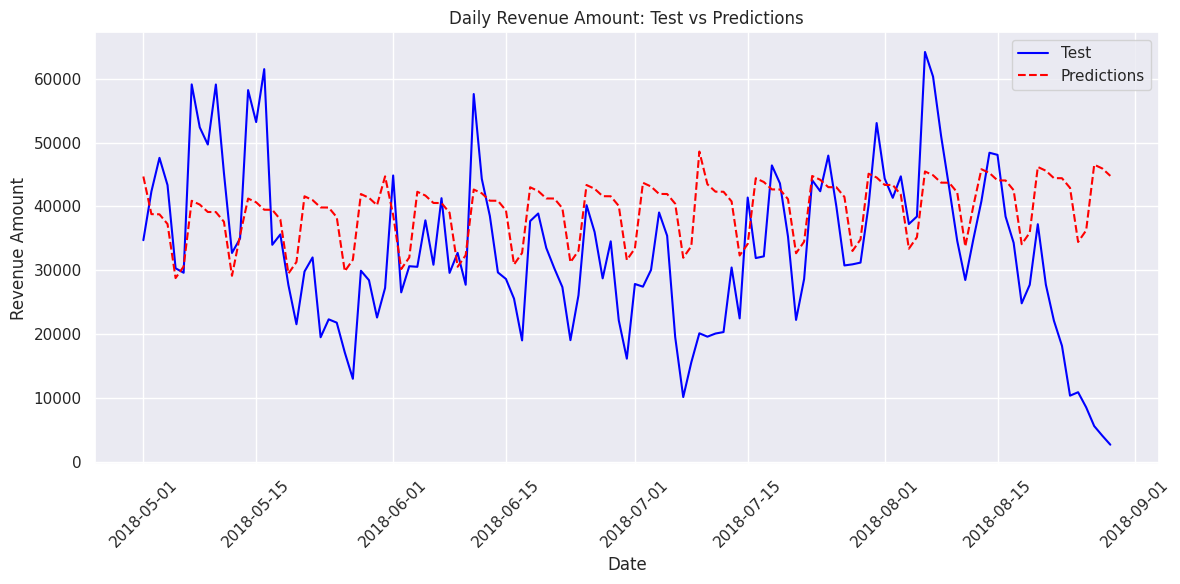

In [ ]:
plot_test_predictions(test_dfex['total_amount'], sarimax_predictions)

### SARIMAX Forecast

In [ ]:
# Forecast Window
exog=holiday.loc[(holiday.index> '2018-04-30') & (holiday.index<= '2018-10-27') ]
exog_df=exog.copy()

days = 180
exog_param=(exog_df[['is_holiday']])
sarimax_forecast = sarimax_model_fit.forecast(days, exog=exog_param)
sarimax_forecast_series = pd.Series(sarimax_forecast, index=sarimax_forecast.index)

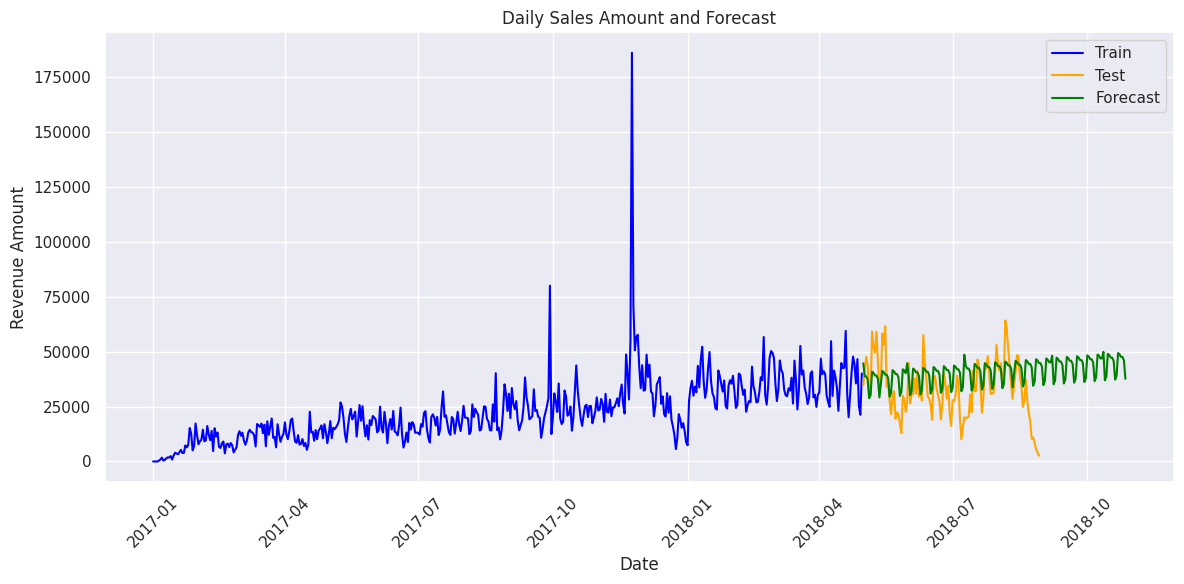

In [ ]:
plot_forecast(train_dfex['total_amount'], test_dfex['total_amount'], sarimax_forecast_series)

### Observations:
- Although our MAPE and RMSE have been reduced after introduction of holidays and tuning the order but still the model is unable to perform well.
- It is capturing some small peaks but not very accurately.
- We can try some othe models and see how they perform.

# 6. Modelling (Facebook Prophet)

<a id="FB_Prophet"></a>

FB Prophet is a forecasting package in Python that was developed by Facebook’s data science research team. The goal of the package is to give business users a powerful and easy-to-use tool to help forecast business results without needing to be an expert in time series analysis. We will apply this model and see how it performs.

## 6.1 Preparing data for FB Prophet

<a id="fb_prep"></a>

Faecbook prophet needs data in a certain format to be able to process it. The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement here in our case it is total_amount.

In [ ]:
#preparing the dataframe for fbProphet

prophet_df=dfex['total_amount'].reset_index()
prophet_df.rename(columns={"index": "ds", "total_amount": "y"}, inplace=True)

#using our original train_df and test_df we will convert them into prophet train andt test set.
prophet_train = train_df["total_amount"].reset_index()
prophet_train.rename(columns={"order_purchase_timestamp": "ds", "total_amount": "y"}, inplace=True)
prophet_test = test_df["total_amount"].reset_index()
prophet_test.rename(columns={"order_purchase_timestamp": "ds", "total_amount": "y"}, inplace=True)

In [ ]:
prophet_df.head()

ds      y
0 2017-01-01    0.0
1 2017-01-02    0.0
2 2017-01-03    0.0
3 2017-01-04    0.0
4 2017-01-05  396.9

## 6.2 Applying a Baseline FB Prophet

<a id="fb_baseline"></a>

Since we observed that our data has positive trend and seasonality, we will set growth ='linear' and let the model find out appropriate seasonality by making yearly_seaonality, daily_seasonality and weekly_seasonality = True.

In [ ]:
#instantiate the model
fb_baseline = Prophet(growth='linear',
                yearly_seasonality=True,
                daily_seasonality=True,
                weekly_seasonality=True)
fb_baseline.fit(prophet_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/1whnns5v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/aikl8ky6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64822', 'data', 'file=/tmp/tmpwln5oqp4/1whnns5v.json', 'init=/tmp/tmpwln5oqp4/aikl8ky6.json', 'output', 'file=/tmp/tmpwln5oqp4/prophet_modelbaynxyt8/prophet_model-20240810202244.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:22:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:22:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### Predictions using baseline Prophet

In [ ]:
#make predictions dataframe
future_base = fb_baseline.make_future_dataframe(periods=len(test_df), freq="D")

In [ ]:
#make a forecast
forecast_base = fb_baseline.predict(future_base)
forecast_base[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
601 2018-08-25  40070.180461  28343.227088  51938.010926
602 2018-08-26  41065.912942  30123.068741  52224.016167
603 2018-08-27  49036.118519  37301.393892  60196.827024
604 2018-08-28  49314.310143  37881.124718  61201.652295
605 2018-08-29  48418.895301  37448.617624  59547.640521

In [ ]:
forecast_base[-121:].reset_index()['yhat']


0      41879.401498
1      40831.508820
2      40505.740586
3      41009.029639
4      34284.041438
           ...     
116    40070.180461
117    41065.912942
118    49036.118519
119    49314.310143
120    48418.895301
Name: yhat, Length: 121, dtype: float64

## 6.3 Plotting and Evaluating Baseline model

<a id="fb_plot"></a>

In [ ]:
#evaluating on test set
fb_baseline_mape = mape_metrics(prophet_test['y'], forecast_base[-121:].reset_index()['yhat'] )
fb_baseline_rmse = rmse_metrics(prophet_test['y'], forecast_base[-121:].reset_index()['yhat'] )

print(f'Root Mean Squared Error | RMSE: {fb_baseline_rmse}')
print(f'Mean Absolute Percentage Error | MAPE: {fb_baseline_mape}')

Root Mean Squared Error | RMSE: 15192.77
Mean Absolute Percentage Error | MAPE: 76.79


#### Plotting the forecast using Baseline FB Prophet

In [ ]:
pip install -U kaleido

In [ ]:
from fbprophet.plot import plot_plotly

fig = plot_plotly(fb_baseline, forecast_base)
fig.update_layout(
    title="Daily Sales amount",
    xaxis_title="Date",
    yaxis_title="Revenue amount"
    )
# fig.show()
fig.show("svg")


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.10.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl.metadata (6.3 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.0 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
  Using cached httpstan-4.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.9 kB)
  Using cached crashtest-0.3.1-py3-none-any.whl.metadata (748 bytes)
  Using cached pastel-0.2.1-py2.py3-none-any.whl.metadata (1.9 k

In [ ]:
pip install pystan==2.19.1.1


  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
ERROR: Operation cancelled by user
^C


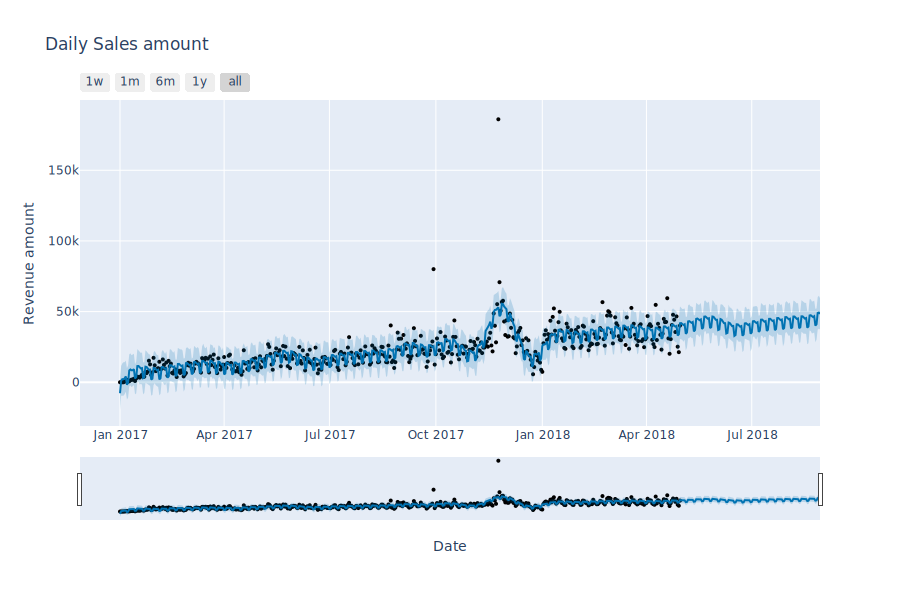

In [ ]:
!pip install -U kaleido

import kaleido  # Import the kaleido module

from prophet.plot import plot_plotly

fig = plot_plotly(fb_baseline, forecast_base)
fig.update_layout(
    title="Daily Sales amount",
    xaxis_title="Date",
    yaxis_title="Revenue amount"
    )
# fig.show()
fig.show("svg")

#### Observations:

- Although the prophet didn't give us a good MAPE or RMSE yet form the plot we can see that it is able to capture seasonality, trend, some peaks and troughs.
- It is worth to explore futher by tuning the hyper parameters and include the holiday impact.

## 6.4 Tuning FB Prophet using Grid Search

<a id="fb_tuning"></a>

### Adding external variable Holiday

In [ ]:
#preparing the holiday dataframe as per prophet
holiday_df_fb = pd.DataFrame({
  'holiday': 'Brazil holidays',
  'ds': pd.to_datetime(holiday_df.loc[holiday_df['is_holiday']==1].index)})

#### Adding impact of holiday on our baseline

In [ ]:
fb_baseline_holi = Prophet(growth='linear',
                           holidays=holiday_df_fb,
                           yearly_seasonality=True,
                           daily_seasonality=True,
                           weekly_seasonality=True).add_country_holidays(country_name='BR')

fb_baseline_holi.fit(prophet_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/5ski8omt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/85cax91o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1587', 'data', 'file=/tmp/tmpwln5oqp4/5ski8omt.json', 'init=/tmp/tmpwln5oqp4/85cax91o.json', 'output', 'file=/tmp/tmpwln5oqp4/prophet_modelmzjdml98/prophet_model-20240810203641.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:36:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:36:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#preparing forcast dataframe
future_base_holi = fb_baseline_holi.make_future_dataframe(periods=len(test_df), freq="D")

In [ ]:
#doing acrtual forecast
forecast_base_holi = fb_baseline_holi.predict(future_base_holi)
forecast_base_holi[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
601 2018-08-25  40690.386440  29745.103183  51529.778806
602 2018-08-26  41488.585697  30636.798556  52936.108037
603 2018-08-27  49661.852841  38449.957005  61701.740242
604 2018-08-28  49719.841421  38569.591216  60148.538920
605 2018-08-29  49111.473958  36709.213569  59517.941631

#### Evaluating the model on test data

In [ ]:
#evaluating on test set
fb_baseline_holi_mape=mape_metrics(prophet_test['y'], forecast_base_holi[-121:].reset_index()['yhat'] )
fb_baseline_holi_rmse=rmse_metrics(prophet_test['y'], forecast_base_holi[-121:].reset_index()['yhat'] )

print(f'Root Mean Squared Error | RMSE: {fb_baseline_holi_rmse}')
print(f'Mean Absolute Percentage Error | MAPE: {fb_baseline_holi_mape}')


Root Mean Squared Error | RMSE: 15593.93
Mean Absolute Percentage Error | MAPE: 78.53


#### Observations:

- Our baseline model actually became worse. We should tune the parameters to improve it.

### Tuning FB Prophet

We will try to tune the following parameters i.e. seasonality_mode, changepoint_prior_scale and holiday_prior_scale.

Lets us discuss these parameters.

Seasonality_mode : By default FB Prophet select additive but we want to give it a option to try multiplicative.

holidays_prior_scale. This parameter determines how much of an effect holidays should have on your predictions. Defalut is 10, This could also be tuned on a range of [0.01, 10].

Changepoints are the points in your data where there are sudden and abrupt changes in the trend.
The other parameter, changepoint_prior_scale determines the flexibility of the trend, and in particular how much the trend changes at the trend changepoints. The default of 0.05 works for many time series, but this could be tuned; a range of [0.001, 0.5] would likely be about right.

[Reference](https://facebook.github.io/prophet/docs/diagnostics.html)

In [ ]:
from sklearn.model_selection import ParameterGrid
params_grid = {'seasonality_mode':('multiplicative','additive'),
               'changepoint_prior_scale':[0.1, 0.4, 0.5],
               'holidays_prior_scale':[0.4, 0.5, 0.6, 0.8, 10]}
grid = ParameterGrid(params_grid)
cnt = 0
for p in grid:
    cnt = cnt+1

print('Total Possible Models',cnt)


Total Possible Models 30


#### Hyperparameter tuning of FB Prophet

In [ ]:
#hyper parameter optimization for FB Prophet
tunning_summary = pd.DataFrame(columns=['Param', 'RMSE', 'MAPE'])
import random
val=pd.DataFrame()
for p in grid:
#     print(p)
    random.seed(0)
    train_model =Prophet(growth='linear',
                         changepoint_prior_scale = p['changepoint_prior_scale'],
                         holidays_prior_scale = p['holidays_prior_scale'],
                         seasonality_mode = p['seasonality_mode'],
                         seasonality_prior_scale=10,
                         weekly_seasonality=True,
                         daily_seasonality = True,
                         yearly_seasonality = True,
                         holidays=holiday_df_fb)
    train_model.add_country_holidays(country_name='BR')
    train_model.fit(prophet_train)
    grid_forecast = train_model.make_future_dataframe(periods=121, freq='D',include_history = False)
    grid_forecast = train_model.predict(grid_forecast)
    val_df=grid_forecast[['ds','yhat']]
    mapes=np.mean(np.abs((prophet_test['y']-val_df['yhat'])/prophet_test['y']))*100
    rmses = np.sqrt(np.mean((prophet_test['y']-val_df['yhat'])**2))
    # Find the best parameters
    data= {"Param": f'{p}',
           "RMSE": rmses,
           "MAPE": mapes }

    tunning_summary=pd.concat([tunning_summary, pd.DataFrame(data, columns=tunning_summary.columns, index=[1])], ignore_index=True)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/w3nwlw76.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/l706gxhn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32227', 'data', 'file=/tmp/tmpwln5oqp4/w3nwlw76.json', 'init=/tmp/tmpwln5oqp4/l706gxhn.json', 'output', 'file=/tmp/tmpwln5oqp4/prophet_modelq1ql6uyj/prophet_model-20240810203710.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:37:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:37:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/1s5gumtc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/v0waqudg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
#reading the summary
tunning_summary

Param          RMSE  \
0   {'changepoint_prior_scale': 0.1, 'holidays_pri...  16698.351724   
1   {'changepoint_prior_scale': 0.1, 'holidays_pri...  14179.788768   
2   {'changepoint_prior_scale': 0.1, 'holidays_pri...  14299.078724   
3   {'changepoint_prior_scale': 0.1, 'holidays_pri...  14174.554829   
4   {'changepoint_prior_scale': 0.1, 'holidays_pri...  13643.308369   
5   {'changepoint_prior_scale': 0.1, 'holidays_pri...  14258.152999   
6   {'changepoint_prior_scale': 0.1, 'holidays_pri...  14596.232427   
7   {'changepoint_prior_scale': 0.1, 'holidays_pri...  13996.359222   
8   {'changepoint_prior_scale': 0.1, 'holidays_pri...  12826.175403   
9   {'changepoint_prior_scale': 0.1, 'holidays_pri...  14388.145000   
10  {'changepoint_prior_scale': 0.4, 'holidays_pri...  12631.021151   
11  {'changepoint_prior_scale': 0.4, 'holidays_pri...  13234.201360   
12  {'changepoint_prior_scale': 0.4, 'holidays_pri...  12540.820933   
13  {'changepoint_prior_scale': 0.4, 'holidays_pri...  13170.088837   
14  {'changepoint_prior_scale': 0.4, 'holidays_pri...  12568.707629   
15  {'changepoint_prior_scale': 0.4, 'holidays_pri...  13196.122459   
16  {'changepoint_prior_scale': 0.4, 'holidays_pri...  16271.902930   
17  {'changepoint_prior_scale': 0.4, 'holidays_pri...  13222.704250   
18  {'changepoint_prior_scale': 0.4, 'holidays_pri...  36370.800080   
19  {'changepoint_prior_scale': 0.4, 'holidays_pri...  13229.302083   
20  {'changepoint_prior_scale': 0.5, 'holidays_pri...  12556.743625   
21  {'changepoint_prior_scale': 0.5, 'holidays_pri...  13164.167622   
22  {'changepoint_prior_scale': 0.5, 'holidays_pri...  12717.001384   
23  {'changepoint_prior_scale': 0.5, 'holidays_pri...  13179.622000   
24  {'changepoint_prior_scale': 0.5, 'holidays_pri...  16480.269553   
25  {'changepoint_prior_scale': 0.5, 'holidays_pri...  13078.471518   
26  {'changepoint_prior_scale': 0.5, 'holidays_pri...  23354.928675   
27  {'changepoint_prior_scale': 0.5, 'holidays_pri...  13174.646883   
28  {'changepoint_prior_scale': 0.5, 'holidays_pri...  40431.168674   
29  {'changepoint_prior_scale': 0.5, 'holidays_pri...  13183.024341   

          MAPE  
0    79.805710  
1    70.580921  
2    67.289520  
3    70.564383  
4    63.685357  
5    71.030632  
6    69.056290  
7    69.495521  
8    58.325922  
9    71.761202  
10   56.160832  
11   64.719753  
12   54.201491  
13   64.281661  
14   52.927787  
15   64.457877  
16   75.790719  
17   64.626836  
18  174.770302  
19   64.665328  
20   54.609259  
21   64.249405  
22   51.457991  
23   64.345403  
24   76.981591  
25   63.651037  
26  114.452740  
27   64.305062  
28  195.104981  
29   64.362702

In [ ]:
#filtering the row with minimum MAPE
tunning_summary.loc[tunning_summary['MAPE']==tunning_summary['MAPE'].min(),:]

Param          RMSE       MAPE
22  {'changepoint_prior_scale': 0.5, 'holidays_pri...  12717.001384  51.457991

In [ ]:
#getting the parameter values
tunning_summary.iloc[16, :]['Param']

"{'changepoint_prior_scale': 0.4, 'holidays_prior_scale': 0.8, 'seasonality_mode': 'multiplicative'}"

In [ ]:
#fitting the model on tuned parameters
fb_tuned = Prophet(growth='linear',
                   changepoint_prior_scale= 0.4,
                   holidays_prior_scale= 0.8,
                   seasonality_mode= 'multiplicative',
                   seasonality_prior_scale=10,
                   holidays=holiday_df_fb,
                   yearly_seasonality=True,
                   daily_seasonality=True,
                   weekly_seasonality=True).add_country_holidays(country_name='BR')

fb_tuned.fit(prophet_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/6_fx_ezn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwln5oqp4/uqgibe7p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60994', 'data', 'file=/tmp/tmpwln5oqp4/6_fx_ezn.json', 'init=/tmp/tmpwln5oqp4/uqgibe7p.json', 'output', 'file=/tmp/tmpwln5oqp4/prophet_modelzmvxcr_g/prophet_model-20240810203901.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:39:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:39:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#make future dataframe
fb_tuned_future=fb_tuned.make_future_dataframe(periods=121, freq="D")
# ,include_history = False

In [ ]:
#forecasting
forecast_tuned = fb_tuned.predict(fb_tuned_future)

In [ ]:
forecast_tuned [['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
601 2018-08-25  31325.290441  16540.190400  45952.717228
602 2018-08-26  32269.010656  18345.252278  47268.028502
603 2018-08-27  49311.443992  31059.182604  67810.239456
604 2018-08-28  49299.073524  30362.165678  67461.271359
605 2018-08-29  46204.808330  28097.178117  64169.182356

## 6.5 Plotting and evaluating Tuned FB Prophet

<a id="fb_fin"></a>

#### Evaluating tuned FB Prophet

In [ ]:
#evaluating on test set
fb_tuned_mape=mape_metrics(prophet_test['y'], forecast_tuned[-121:].reset_index()['yhat'] )
fb_tuned_rmse=rmse_metrics(prophet_test['y'], forecast_tuned[-121:].reset_index()['yhat'] )

print(f'Root Mean Squared Error | RMSE: {fb_tuned_rmse}')
print(f'Mean Absolute Percentage Error | MAPE: {fb_tuned_mape}')

Root Mean Squared Error | RMSE: 16271.9
Mean Absolute Percentage Error | MAPE: 75.79


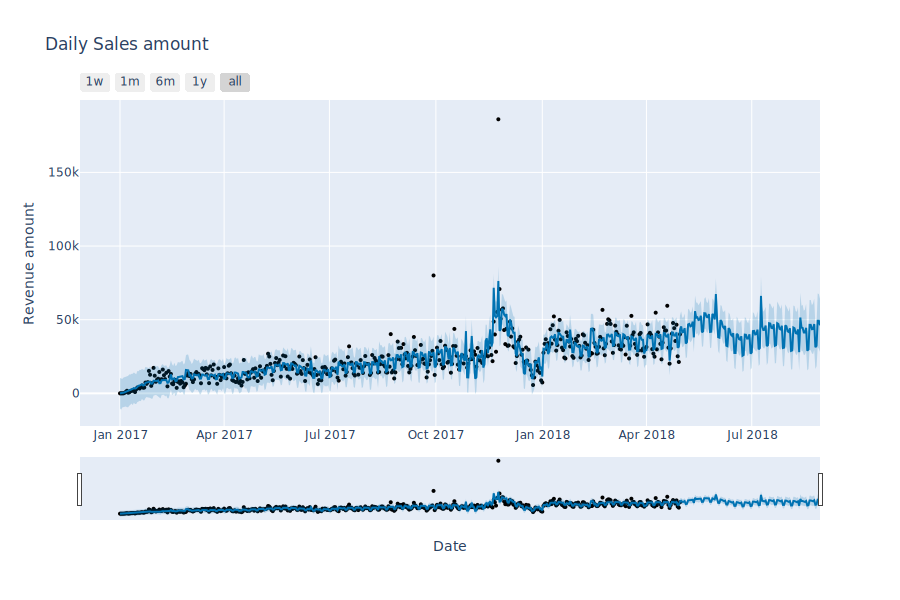

In [ ]:
fig = plot_plotly(fb_tuned, forecast_tuned )
fig.update_layout(
    title="Daily Sales amount",
    xaxis_title="Date",
    yaxis_title="Revenue amount"
    )
# fig.show()
fig.show("svg")

#### Observations:

- We have recieved a much better performance with tuned FB Prophet.
- It is able to pick seasonality and has captured some peaks and troughs.
- We will proceed ahead and keep this model as our benchmark and we will explore other models like XG Boost Regressor and LSTM.

In [ ]:
 prophet_test['y'].mean()

33023.68223140496

In [ ]:
 forecast_tuned['yhat'][-121:].mean()

42202.97888113521

### Summary:

|Model|RMSE|MAPE|
|----|----|----|
|SARIMA(1,1,1)(0,1,1)(7)| 13810.59 |68.99 |
|SARIMAX(1,1,2)(0,1,1)(7) Including impact of holidays| 13312.72 |65.66|
|Baseline Prophet| 27437.77 |71.78|
|Baseline Prophet with holiday| 15393.64 |77.88|
|Tuned Prophet with holiday| 15017.81 |29.58|

# 7. Modelling (XG Boost Regression)

<a id="xg_boost"></a>

XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling. We will try to implement this model.

For XGBoost we cannot feed a time series as such, we will have to extract date time features from our order timestamp to make up the independent variables in order to predict 'total_amount'.

## 7.1 Preparing data for XG Boost Regression

<a id ="xg_boost_prep"></a>

We will be creating a function to extract features from date. We will also add holiday as a feature.

In [ ]:
#function to extract features from date
def create_features(dataframe, label=None):
    df=dataframe.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(int)
    X = df[['dayofweek', 'quarter', 'month', 'year', 'dayofyear','dayofmonth', 'weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [ ]:
#creating dataframe with only required columns
daily_data_xgb=dfex[['total_amount', 'is_holiday']]

In [ ]:
#Separating X and y
X, y= create_features(daily_data_xgb, label='total_amount')
X['is_holiday']=daily_data_xgb['is_holiday']

In [ ]:
X.head()

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
2017-01-01          6        1      1  2017          1           1   
2017-01-02          0        1      1  2017          2           2   
2017-01-03          1        1      1  2017          3           3   
2017-01-04          2        1      1  2017          4           4   
2017-01-05          3        1      1  2017          5           5   

            weekofyear  is_holiday  
2017-01-01          52           1  
2017-01-02           1           0  
2017-01-03           1           0  
2017-01-04           1           0  
2017-01-05           1           0

In [ ]:
#splitting the data for train andt test

train_end = '2018-4-30'
test_end = '2018-8-29'

X_train, X_test = train_test_split(X, train_end, test_end)
y_train, y_test = train_test_split(y, train_end, test_end)

## 7.2 Baseline model on daily data and its performance

<a id ="xg_baseline"></a>

Let us apply a baseline XG Boost Regression and we will then evaluate its performance.

In [ ]:
#instantiate the XGBoost Model
reg = xgb.XGBRegressor(n_estimators=1000, max_depth=3)

# Use early stopping with XGBoost's own cross-validation function
# Assuming you want to use early stopping during cross-validation,
# you would typically integrate it into a cross-validation scheme like this:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

# Placeholder for storing evaluation results
results = []

for train_index, test_index in kfold.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Convert data to DMatrix format for XGBoost
    dtrain = xgb.DMatrix(X_train_fold, label=y_train_fold)
    dval = xgb.DMatrix(X_val_fold, label=y_val_fold)

    # Set up parameters for XGBoost training
    params = {
        'objective': 'reg:squarederror',  # Example objective function, adjust as needed
        'eval_metric': 'rmse'  # Example evaluation metric, adjust as needed
    }

    # Train the model with early stopping
    num_round = 1000  # Maximum number of boosting rounds
    early_stopping_rounds = 50
    evals = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(params, dtrain, num_round, evals=evals,
                      early_stopping_rounds=early_stopping_rounds,
                      verbose_eval=False)

    # Evaluate the model and store results
    y_pred = model.predict(dval)
    # Calculate your desired evaluation metric (e.g., RMSE) and store it in 'results'

# Fit the model without early stopping for final evaluation
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

We can see how features impact the prediction of total_amount.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

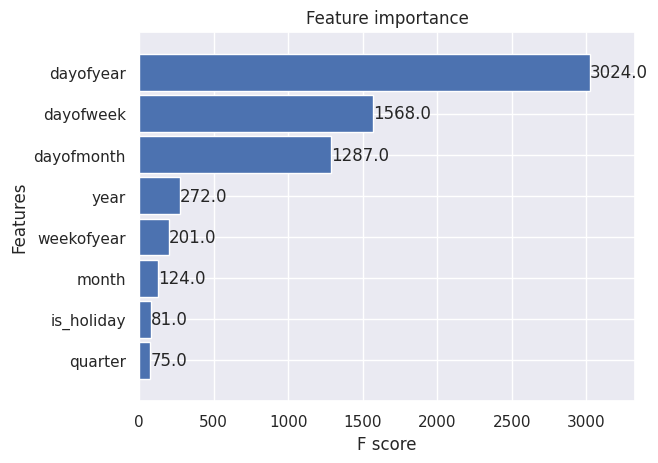

In [ ]:
#plot feature importance
plot_importance(reg, height=0.9)

#### Evaluating the perfomance for baseline XGB

In [ ]:
#evaluating on test set
predictions_xgb = reg.predict(X_test)
#calculating MAPE and RMSE
mape_xgb=mape_metrics(y_test, predictions_xgb )
rmse_xgb=rmse_metrics(y_test, predictions_xgb )

print(f'Root Mean Squared Error | RMSE: {rmse_xgb}')
print(f'Mean Absolute Percentage Error | MAPE: {mape_xgb}')

Root Mean Squared Error | RMSE: 12843.8
Mean Absolute Percentage Error | MAPE: 60.02


In [ ]:
#if doing forecasting
start_date=datetime(2018,8,30)
end_date=start_date+pd.DateOffset(days=30)
full_range = pd.date_range(start=start_date, end=end_date, freq="D")
filtered_data= holiday.loc[(holiday.index >= start_date) & (holiday.index <= end_date)]
forecast_df=pd.DataFrame(data=filtered_data, index=full_range, columns=['is_holiday'])

In [ ]:
#creating features for new dates
X_forcast=create_features(forecast_df)
X_forcast['is_holiday']=forecast_df['is_holiday']

In [ ]:
#making forecast
xgb_forecast=reg.predict(X_forcast)

In [ ]:
#creating dataframe for all the y values
y_train_df = pd.DataFrame(y_train, train_df.index, columns=['total_amount'] )
y_test_df = pd.DataFrame(y_test, test_df.index, columns=['total_amount'] )
xgb_forecast_df=pd.DataFrame(xgb_forecast, forecast_df.index, columns=['Forecast'] )

In [ ]:
# predictions_xgb_df=pd.DataFrame(predictions_xgb, y_test_df.index, columns=['Predictions'] )

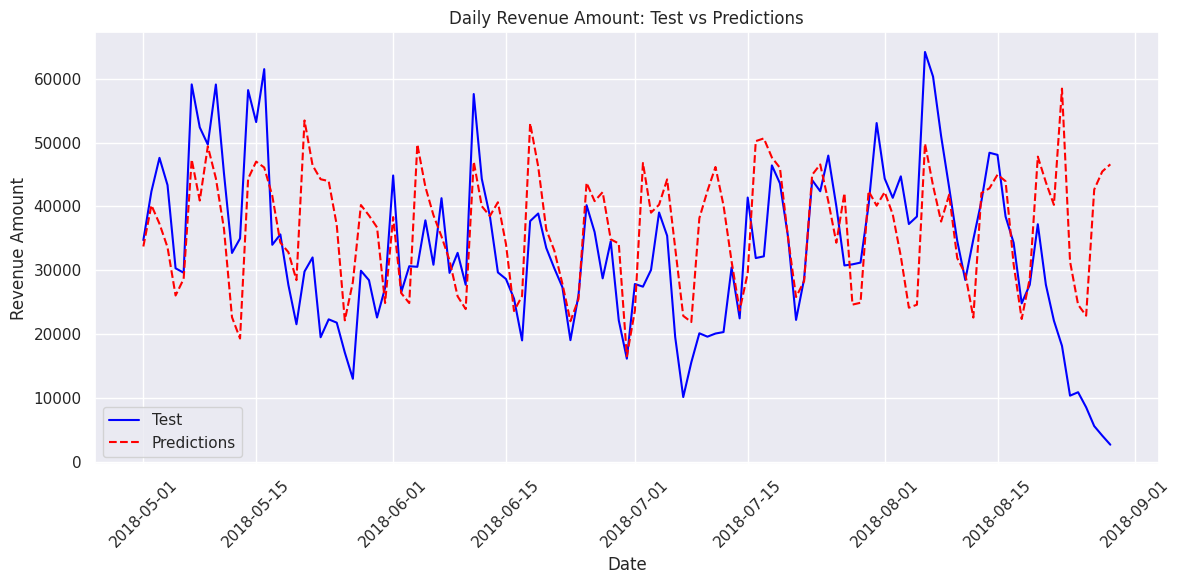

In [ ]:
#plotting test and predictions
plot_test_predictions(y_test_df['total_amount'], predictions_xgb  )

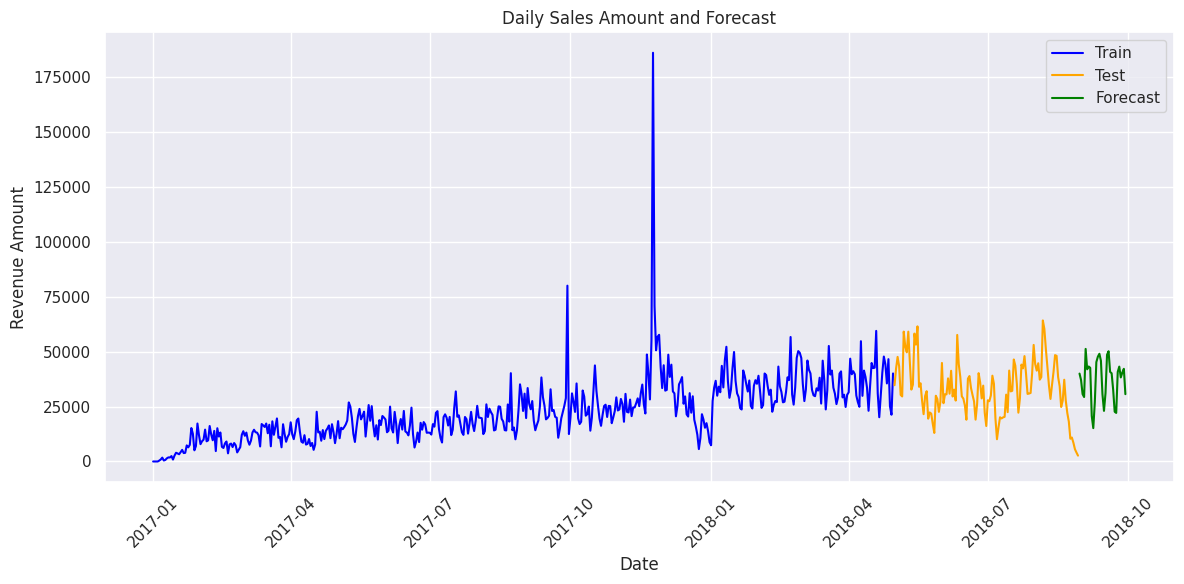

In [ ]:
#plotting forecast
plot_forecast(y_train_df['total_amount'], y_test_df['total_amount'], xgb_forecast_df['Forecast'] )

#### Observations:

- Uponn plotting both test and predicted values we can see that the predicted series is just picking the seasonality but not the pattern within the week.
- It looks like it has constant trend.
- **Although it is not capturing the noise but it I think beacuse of limited datapoints it is not performing well.**

## 7.3 Tuning XG Boost and evaluating and its performance

<a id = 'xg_tuned' ></a>

Early stopping is a technique used to stop training when the loss on validation dataset starts increase (in the case of minimizing the loss). That’s why to train a model (any model, not only Xgboost) you need two separate datasets:

training data for model fitting,
validation data for loss monitoring and early stopping.

In [ ]:
num_estimators= [i for i in range(100, 1010, 100)]
depth=[i for i in range(3, 15, 2)]
learning=[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]

In [ ]:
XGB_summary=pd.DataFrame(columns=['n_estimators', 'max_depth', 'learning_rate', 'MAPE', 'RMSE' ])

for i in num_estimators:
    for j in depth:
        for k in learning:
            model_reg= xgb.XGBRegressor(n_estimators=i, max_depth=j, learning_rate=k )
            model_reg.fit(X_train, y_train)
            predictions_xgb = model_reg.predict(X_test)
            mape_xgb=np.mean(np.abs((y_test - predictions_xgb)/y_test))*100
            rmse_xgb = np.sqrt(np.mean((y_test-predictions_xgb)**2))
            data_param={'n_estimators': i,
                        'max_depth': j,
                        'learning_rate': k,
                        'MAPE': mape_xgb,
                        'RMSE' : rmse_xgb }
            XGB_summary=pd.concat([XGB_summary, pd.DataFrame(data_param, columns=XGB_summary.columns, index=[1])], ignore_index=True)


In [ ]:
XGB_summary.sort_values(by ='MAPE', ascending=True).head(10)

n_estimators max_depth  learning_rate       MAPE          RMSE
193          600         7          0.001  45.257311  12509.423583
235          700         9          0.001  45.278575  12877.588892
241          700        11          0.001  45.279076  12877.476649
247          700        13          0.001  45.279076  12877.476649
271          800         9          0.001  45.283213  12556.138798
277          800        11          0.001  45.294431  12563.647442
283          800        13          0.001  45.294431  12563.647442
157          500         7          0.001  45.321256  12904.094865
229          700         7          0.001  45.359420  12196.248983
265          800         7          0.001  45.642699  11950.903668

In [ ]:
#instantiate the XGBoost Model
reg_tuned = xgb.XGBRegressor(n_estimators=200, max_depth=11, learning_rate=0.010)

# Use the 'early_stopping_rounds' parameter within xgb.train() instead of .fit()
reg_tuned = xgb.train(
    params=reg_tuned.get_xgb_params(),  # Extract parameters from the regressor
    dtrain=xgb.DMatrix(X_train, y_train),  # Convert data to DMatrix format
    evals=[(xgb.DMatrix(X_test, y_test), 'validation')],  # Pass validation data
    early_stopping_rounds=50,
    verbose_eval=True  # Display evaluation metrics during training
)

[0]	validation-rmse:16172.48045
[1]	validation-rmse:16079.45693
[2]	validation-rmse:15987.91253
[3]	validation-rmse:15897.83087
[4]	validation-rmse:15809.19677
[5]	validation-rmse:15721.99363
[6]	validation-rmse:15634.80071
[7]	validation-rmse:15549.55225
[8]	validation-rmse:15466.51041
[9]	validation-rmse:15383.46055


In [ ]:
# #evaluating on test set
predictions_xgb_tuned = reg_tuned.predict(xgb.DMatrix(X_test)) # Convert X_test to DMatrix
#calculating MAPE and RMSE
mape_xgb_tuned=mape_metrics(y_test, predictions_xgb_tuned )
rmse_xgb_tuned=rmse_metrics(y_test, predictions_xgb_tuned )

print(f'Root Mean Squared Error | RMSE: {rmse_xgb_tuned}')
print(f'Mean Absolute Percentage Error | MAPE: {mape_xgb_tuned}')

Root Mean Squared Error | RMSE: 15383.46
Mean Absolute Percentage Error | MAPE: 47.47


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

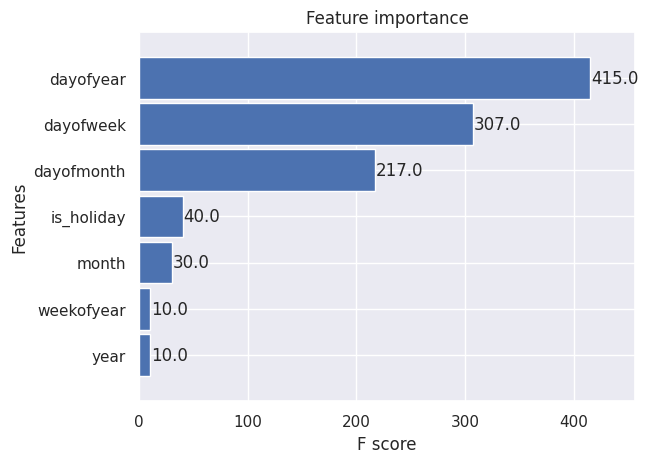

In [ ]:
#plot feature importance
plot_importance(reg_tuned, height=0.9)

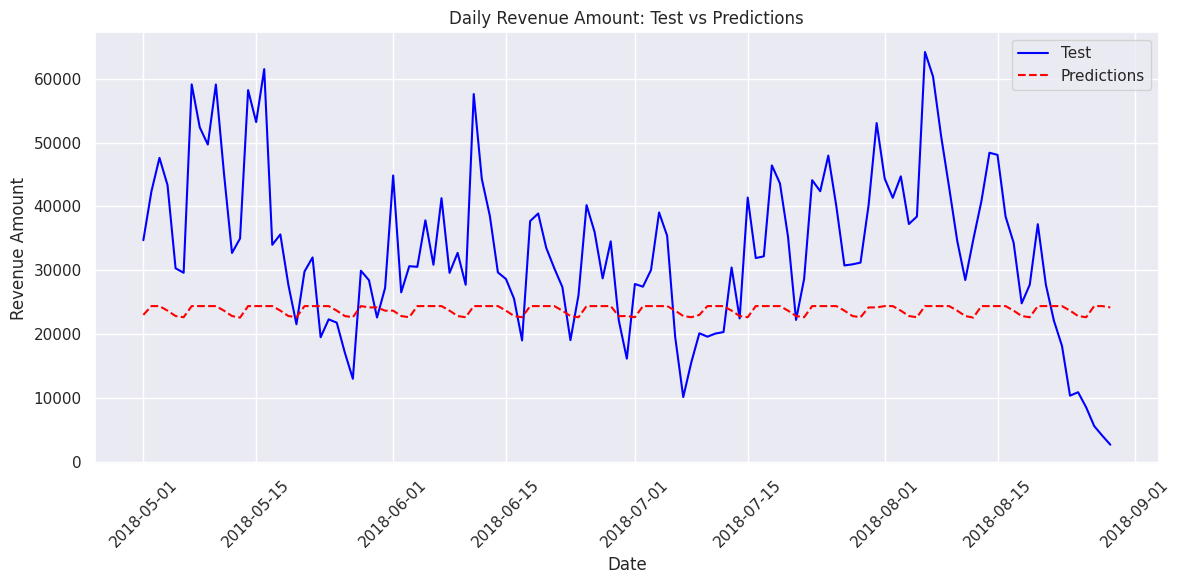

In [ ]:
#plotting test and predictions
plot_test_predictions(y_test_df['total_amount'], predictions_xgb_tuned)

#### Observations:

- After tuning, it is able to capture the peaks of within a week which occurs at the start of week.
- The MAPE obtained is very good but I still less than the tuned FB Prophet.
- Also, since we have a limited data I am assuming that it is not learning enough. It could be tested further on more data.

# 8. Modelling (LSTM)

<a id = "LSTM"></a>

We can use univariate LSTM to predict the next value in out time series. We will use only one step prediction, meaning we will use only one previous observation to predict the next value.

Like previous models of SARIMA, FB Prophet and XG Boost, LSTM also takes the input in certain format. It takes a series of data with number of observations X number of timesteps X number of features.

## 8.1 Preparing data for LSTM

<a id ="lstm_prep"></a>

We need to scale the data in order to apply it to LSTM model.

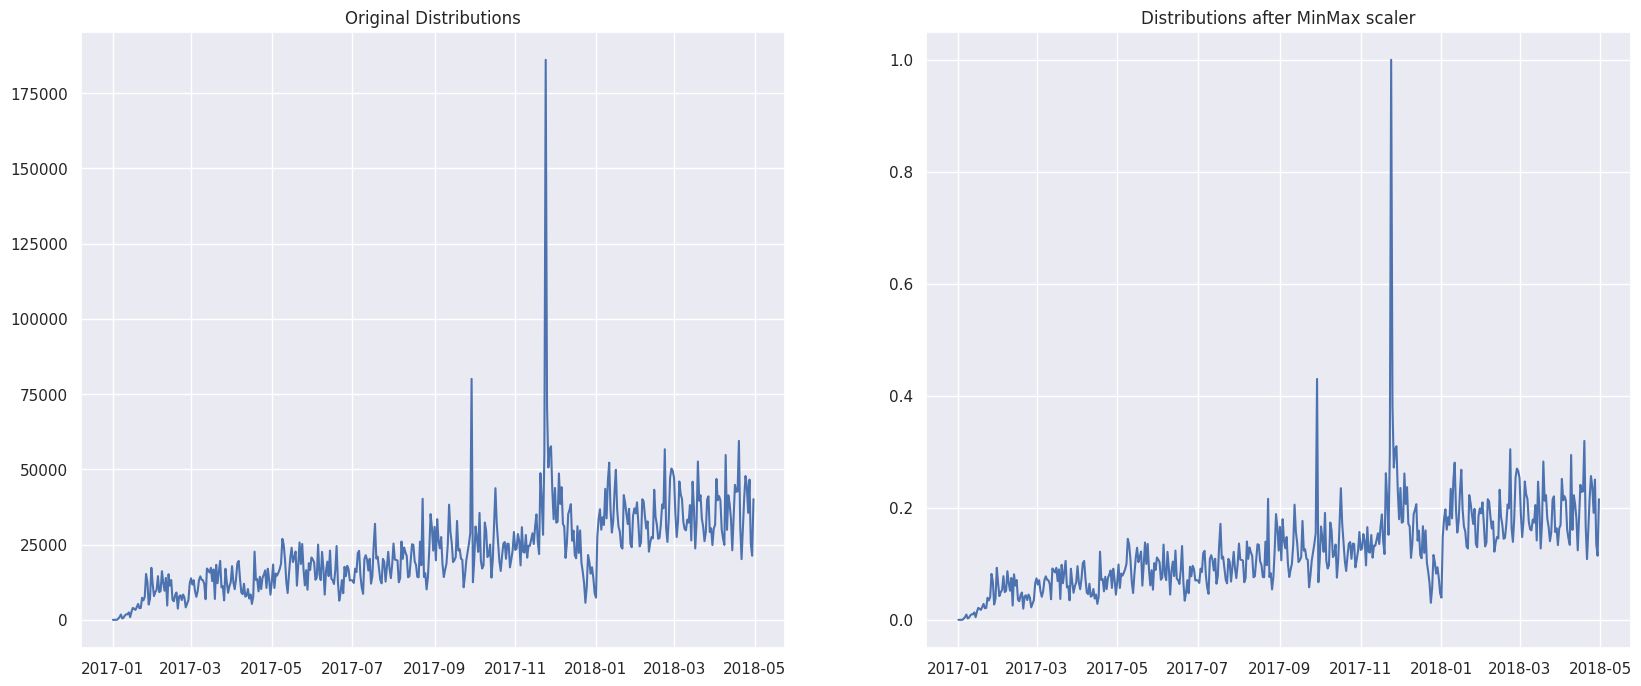

In [ ]:
#scaling the date
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(train_df)
test_scaled = sc.transform(test_df)
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
ax0.set_title('Original Distributions')
ax1.set_title('Distributions after MinMax scaler')
ax0.plot(train_df['total_amount'])
ax1.plot(pd.DataFrame(training_scaled,columns=['total_amount'], index=train_df.index)['total_amount'])

In [ ]:
#define the lookback function for creating y

def lookback(df, window):
    X = list()
    Y = list()

    for i in range(window,len(df)):
        X.append(df[i-window:i, 0])
        Y.append(df[i,0])

    X,Y = np.array(X),np.array(Y)
    return X, Y

In [ ]:
#creating X and y using lookback function
X_train_lstm, y_train_lstm = lookback(training_scaled, 1)
X_test_lstm, y_test_lstm = lookback(test_scaled, 1)

In [ ]:
#checking shape of X
X_train_lstm.shape

(484, 1)

In [ ]:
#reshaping X for LSTM
#number of observations, timesteps and features
X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0],X_train_lstm.shape[1],1))
X_test_lstm = np.reshape(X_test_lstm, (X_test_lstm.shape[0],X_test_lstm.shape[1],1))

In [ ]:
X_train_lstm.shape

(484, 1, 1)

## 8.2 Baseline model on daily data and its performance

<a id ="lstm_baseline_eval"></a>

Let us apply the LSM model with three layers. The starting layer has 100 nodes, second layer has 50 nodes and outut layer has 1 node. We will be using Keras Early stopping function to prevent it from overfitting. We have also chosen the batch size equal to 1

In [ ]:
# random seeds for reproducibility
np.random.seed(123)
tf.random.set_seed(123)

model = Sequential()
# The input of LSTM layer has a shape of (num_timesteps, num_features)
model.add(LSTM(100, return_sequences=True, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(50, activation='relu' ))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, shuffle=False,
                    validation_data=(X_test_lstm, y_test_lstm), verbose=1,
                    callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0059 - val_loss: 0.0106
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0038 - val_loss: 0.0055
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - val_loss: 0.0058
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0060 - val_loss: 0.0051
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0058 - val_loss: 0.0049
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0055 - val_loss: 0.0044
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0051 - val_loss: 0.0040
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0050 - 

In [ ]:
#calaculating predictions
prediction_lstm = model.predict(X_test_lstm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step


#### Predictions and evaluation using LSTM

In [ ]:
#predicting and inversing the predictions to original time scale.

prediction_inverse = sc.inverse_transform(prediction_lstm.reshape(-1, 1))
y_test_inverse = sc.inverse_transform(y_test_lstm.reshape(-1, 1))

prediction2_inverse = np.array(prediction_inverse[:,0][1:])
y_test2_inverse = np.array(y_test_inverse[:,0])

In [ ]:
#Evaluating the LSTM model.

y_test2_inverse_without_last = y_test2_inverse[:-1]
rmse_lstm = rmse_metrics(y_test2_inverse_without_last, prediction2_inverse)
mape_lstm = mape_metrics(y_test2_inverse_without_last, prediction2_inverse)
print(f"Root Mean Squared Error | RMSE: {rmse_lstm}")
print(f"Mean Absolute Percentage Error | MAPE: {mape_lstm}")

Root Mean Squared Error | RMSE: 3609.07
Mean Absolute Percentage Error | MAPE: 10.9


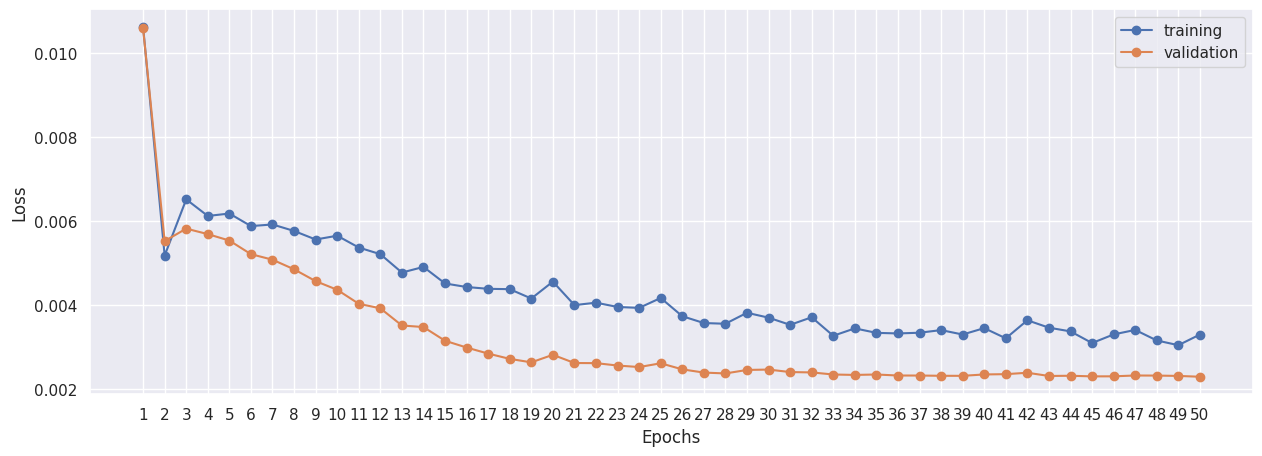

In [ ]:
#plotting performance of the model
epochs = range(1, 51)

plt.figure(figsize=(15, 5))
plt.plot(epochs, history.history["loss"], label="training", marker="o")
plt.plot(epochs, history.history["val_loss"], label="validation", marker="o")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

Looking at the training metrics, we see that the validation and training loss decrease in parallel (so we are not overfitting):

- The plot of training loss decreases to a point of stability.
- The plot of validation loss decreases to a point of stability and has a small gap with the training loss.

#### Plotting the test and prediction values

In [ ]:
test_df[: -2].index
y_test2_inverse_without_last=pd.DataFrame(y_test2_inverse_without_last, columns=['total_amount'], index= test_df[: -2].index)

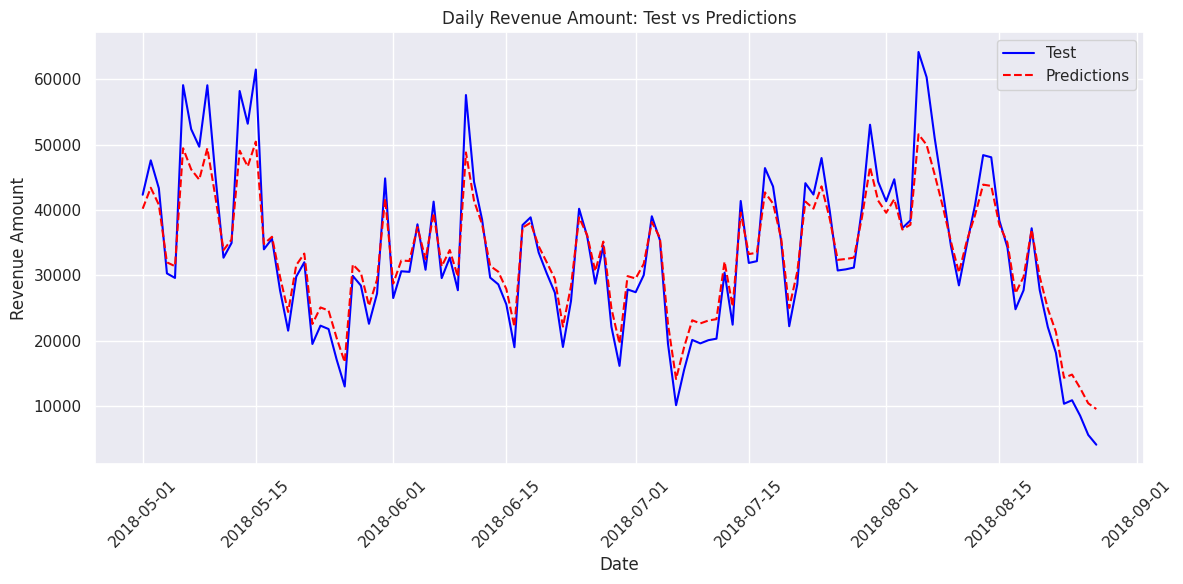

In [ ]:
plot_test_predictions(y_test2_inverse_without_last['total_amount'], prediction2_inverse )

`Note:` We have applied only one step time series forecasting which predicts the observation at the next time step.

Although we are getting very good result but still I am reluctant to proceed ahead with this model because we have limited sales data. We need to test it on more data to see how it performs.

# 9. Discussing issues encountered with hourly sampled data

<a id ="discussion"></a>

In an attempt to increase the data points, I tried to resample the dataset at hourly level and discovered that I got a lot of zero values at certain time of day because no order was placed during that time. I tried applying SAIMA model but it resulted in negative predictions and decreasing trend. Upon further reading and consulting, found that we will need to do some transfromations or apply differnt approaches to handle such data. Therfore, I limited myself to the daily data only.

# 10.Conclusion

<a id= "conclusion"></a>

Here is the summary of all the modela we tested:
    
 ### Summary:

|Model|MAPE|
|----|----|
|SARIMA(1,1,1)(0,1,1)(7)|68.99 |
|SARIMAX(1,1,2)(0,1,1)(7) Including impact of holidays|65.66|
|Baseline Prophet|71.78|
|Baseline Prophet with holiday|77.88|
|Tuned Prophet with holiday|29.58|
|XGBoost Regression including Holiday|52.18|
|Tuned XGBoost Regression including Holiday|47.58|
|LSTM (one step Prediction)  | 10.9 |

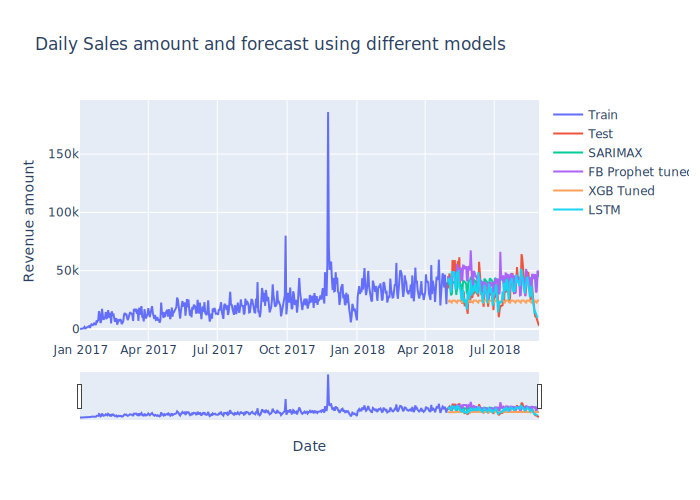

In [ ]:
#plotting all the models together
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_df.index, y=train_df['total_amount'].values, mode='lines', name="Train"))
fig.add_trace(go.Scatter(x=test_df.index, y=test_df['total_amount'].values, mode='lines', name="Test"))
fig.add_trace(go.Scatter(x=test_df.index, y=sarimax_predictions.values, mode='lines', name="SARIMAX"))
fig.add_trace(go.Scatter(x=test_df.index, y=forecast_tuned[-121:]['yhat'].values, mode='lines', name="FB Prophet tuned"))
fig.add_trace(go.Scatter(x=test_df.index, y=predictions_xgb_tuned, mode='lines', name="XGB Tuned"))
fig.add_trace(go.Scatter(x=test_df.index[: -2], y=prediction2_inverse, mode='lines', name="LSTM"))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Revenue amount",
    xaxis_title="Date",
    title="Daily Sales amount and forecast using different models"
)
# fig.write_html("result.html")
# fig.show()
fig.show("svg")

**We will be choosing the FB Prophet as the best performing model because it is able to achieve considerable MAPE.**

For LSTM we may need to do futher resarch and try testing it with more data points to be able to proceed ahead with it.

In [ ]:
#saving the model as pickle file

import joblib

joblib.dump(fb_tuned, "forecasting_model.pkl")

['forecasting_model.pkl']

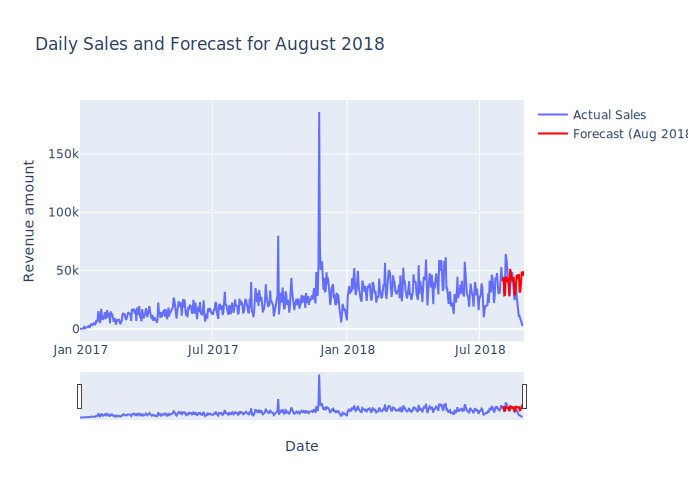

In [ ]:
# prompt: predict the sales of aug 2018 plot graph  show full of 2 years that are in dataset then change the line and tell the forcast of aug 2018

# Assuming 'fb_tuned' is already defined and holds the tuned FB Prophet model

# Predict sales for August 2018
start_date = '2018-08-01'
end_date = '2018-08-31'
future_dates = pd.DataFrame({'ds': pd.date_range(start=start_date, end=end_date)})
forecast_aug = fb_tuned.predict(future_dates)

# Plot the full 2 years of data and highlight August 2018 forecast
fig = go.Figure()

# Plot the entire dataset
fig.add_trace(go.Scatter(x=dfex.index, y=dfex['total_amount'], mode='lines', name='Actual Sales'))

# Highlight August 2018 forecast
fig.add_trace(go.Scatter(x=forecast_aug['ds'], y=forecast_aug['yhat'], mode='lines', name='Forecast (Aug 2018)', line=dict(color='red', width=2)))

fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    yaxis_title="Revenue amount",
    xaxis_title="Date",
    title="Daily Sales and Forecast for August 2018"
)

fig.show("svg")


In [ ]:
import pickle

# Assuming `model` is the object to be pickled
with open('forecasting_model1.pkl', 'wb') as file:
    pickle.dump(model, file)
